In [1]:
#Imports
# -*- coding: utf-8 -*-

import pandas as pd
from IPython.display import display
import csv
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time
import re
import plotly.express as px

from numpy import mean
from numpy import absolute
from numpy import sqrt

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.dummy import DummyRegressor
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, cross_val_predict

from sklearn.linear_model import LinearRegression,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow import keras
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer

In [2]:
#Cargamos dataset
dataML_tramos = pd.read_csv('/../TFM/Machine_Learning_Data/section_data/datos_ML_tramos.csv',sep=';',engine='python')
dataML_tramos

,año,mes,dia,horas,dias_sem,id_tramos,festivo,media
0,2015,1,1,0,4,101,1,419.333333
1,2015,1,1,0,4,103,1,129.000000
2,2015,1,1,0,4,105,1,521.666667
3,2015,1,1,0,4,107,1,370.000000
4,2015,1,1,0,4,108,1,281.000000
...,...,...,...,...,...,...,...,...
3008085,2015,12,31,23,4,20121,0,41.000000
3008086,2015,12,31,23,4,20123,0,10.000000
3008087,2015,12,31,23,4,20124,0,37.000000
3008088,2015,12,31,23,4,20125,0,15.000000


In [158]:
#data_section_1 = dataML_tramos.loc[(dataML_tramos['id_tramos'] == 101)]
#data_section_1 = dataML_tramos.loc[(dataML_tramos['id_tramos'] == 1027)]
#data_section_1 = dataML_tramos.loc[(dataML_tramos['id_tramos'] == 1069)]
#data_section_1 = dataML_tramos.loc[(dataML_tramos['id_tramos'] == 1082)]
#data_section_1 = dataML_tramos.loc[(dataML_tramos['id_tramos'] == 10357)]
data_section_1 = dataML_tramos.loc[(dataML_tramos['id_tramos'] == 107)]

data_section_1.sort_values(by=['id_tramos'], inplace=True)
data_section_1.reset_index(inplace=True)
data_section_1

,index,año,mes,dia,horas,dias_sem,id_tramos,festivo,media
0,3,2015,1,1,0,4,107,1,370.00
1,2015724,2015,8,26,6,3,107,0,196.00
2,2015340,2015,8,26,5,3,107,0,124.00
3,2014938,2015,8,26,1,3,107,0,391.00
4,2014536,2015,8,26,0,3,107,0,578.00
...,...,...,...,...,...,...,...,...,...
7888,998729,2015,4,27,2,1,107,0,66.50
7889,998328,2015,4,27,1,1,107,0,146.00
7890,997926,2015,4,27,0,1,107,0,245.00
7891,997123,2015,4,26,22,7,107,0,725.25


In [159]:
data_section_1['media-24'] = data_section_1['media'].rolling(window=24,center=False).mean()
data_section_1['media-24'] = data_section_1['media-24'].fillna(0)
data_section_1.head(30)

,index,año,mes,dia,horas,dias_sem,id_tramos,festivo,media,media-24
0,3,2015,1,1,0,4,107,1,370.000000,0.000000
1,2015724,2015,8,26,6,3,107,0,196.000000,0.000000
2,2015340,2015,8,26,5,3,107,0,124.000000,0.000000
3,2014938,2015,8,26,1,3,107,0,391.000000,0.000000
4,2014536,2015,8,26,0,3,107,0,578.000000,0.000000
5,2014134,2015,8,25,23,2,107,0,576.250000,0.000000
6,2013733,2015,8,25,22,2,107,0,769.500000,0.000000
7,2013337,2015,8,25,21,2,107,0,1077.250000,0.000000
8,2012951,2015,8,25,20,2,107,0,1320.250000,0.000000
9,2012565,2015,8,25,19,2,107,0,1347.750000,0.000000


In [160]:
data_section_1.rename(columns={'dia':'dia_mes','dias': 'dia_semana', 'id': 'id_tramo','estado':'media',}, inplace=True)
data_section_1.head(5)

,index,año,mes,dia_mes,horas,dias_sem,id_tramos,festivo,media,media-24
0,3,2015,1,1,0,4,107,1,370.0,0.0
1,2015724,2015,8,26,6,3,107,0,196.0,0.0
2,2015340,2015,8,26,5,3,107,0,124.0,0.0
3,2014938,2015,8,26,1,3,107,0,391.0,0.0
4,2014536,2015,8,26,0,3,107,0,578.0,0.0


In [161]:
data_section_1.count()

index        7893
año          7893
mes          7893
dia_mes      7893
horas        7893
dias_sem     7893
id_tramos    7893
festivo      7893
media        7893
media-24     7893
dtype: int64

In [162]:
df_section = data_section_1.copy()
del df_section['index']
df_section.head(5)

,año,mes,dia_mes,horas,dias_sem,id_tramos,festivo,media,media-24
0,2015,1,1,0,4,107,1,370.0,0.0
1,2015,8,26,6,3,107,0,196.0,0.0
2,2015,8,26,5,3,107,0,124.0,0.0
3,2015,8,26,1,3,107,0,391.0,0.0
4,2015,8,26,0,3,107,0,578.0,0.0


In [163]:
df_section[['mes','dia_mes','horas','dias_sem','festivo','media-24','media']].dtypes

mes           int64
dia_mes       int64
horas         int64
dias_sem      int64
festivo       int64
media-24    float64
media       float64
dtype: object

In [164]:
df_section.count()

año          7893
mes          7893
dia_mes      7893
horas        7893
dias_sem     7893
id_tramos    7893
festivo      7893
media        7893
media-24     7893
dtype: int64

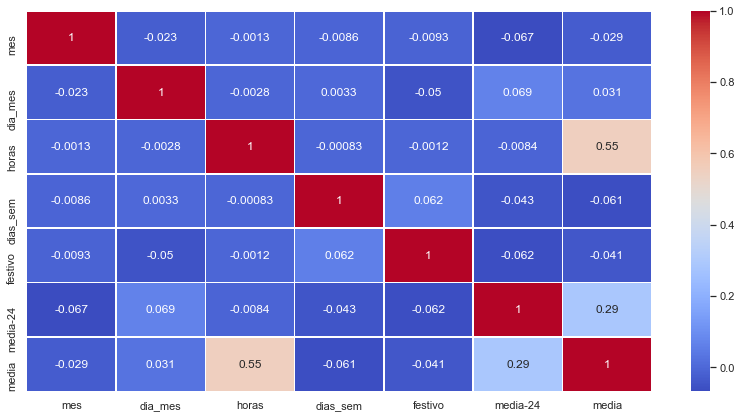

In [165]:
#Correlación de las variables con respecto a estado
df_corr = df_section[['mes','dia_mes','horas','dias_sem','festivo','media-24','media']]
fig, ax = plt.subplots(figsize=(14,7))
sns.heatmap(data=df_corr.astype({'media': 'int32'}).corr(),annot=True,vmax=1.0, cmap='coolwarm',\
            linewidths=.5, ax=ax);

In [166]:
#Generamos las horas a 30/12/2015 y 31/12/2015
start = '2015-12-30 00:00'
dates_48 = pd.date_range(start,freq='H',periods=48).to_frame()
dates_48.rename(columns={0: 'Fecha'},inplace = True)
dates_48.head(5)

,Fecha
2015-12-30 00:00:00,2015-12-30 00:00:00
2015-12-30 01:00:00,2015-12-30 01:00:00
2015-12-30 02:00:00,2015-12-30 02:00:00
2015-12-30 03:00:00,2015-12-30 03:00:00
2015-12-30 04:00:00,2015-12-30 04:00:00


In [167]:
#Generamos las horas a 01/01/2016 y 02/01/2016
start = '2016-01-01 00:00'
pred_dates_48 = pd.date_range(start,freq='H',periods=48).to_frame()
pred_dates_48.rename(columns={0: 'Fecha'},inplace = True)
pred_dates_48.head(5)

,Fecha
2016-01-01 00:00:00,2016-01-01 00:00:00
2016-01-01 01:00:00,2016-01-01 01:00:00
2016-01-01 02:00:00,2016-01-01 02:00:00
2016-01-01 03:00:00,2016-01-01 03:00:00
2016-01-01 04:00:00,2016-01-01 04:00:00


Baseline Model

In [168]:
def baseline_model(X_dummy,y_dummy,v_test_size):
    X_train,X_test,y_train,y_test=train_test_split(X_dummy,y_dummy,test_size=v_test_size,random_state=42)
    
    
    #Modelo Baseline Dummyregressor
    lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)
    
    #Modelo Baseline Linear Regression
    
    y_predict_dummy_mean = lm_dummy_mean.predict(X_test)
    
    rmse_media = []
    rmse_dummy_X = round((sqrt(mean_squared_error(y_test,y_predict_dummy_mean))),2)
    rmse_media.append(rmse_dummy_X)
    
    return rmse_media

In [169]:
X_dummy = df_section[['mes','dia_mes','horas','dias_sem','festivo','media-24']]
y_dummy = df_section['media']

stored = []

counter = 0
for x_d,y_d,z_d in zip(range(0,3),range(0,3),range(0,3)):
    counter +=1
    print('Iteración :',counter)

    x_1 = baseline_model(X_dummy,y_dummy,0.10)
    stored.append(x_1)
    x_2 = baseline_model(X_dummy,y_dummy,0.20)
    stored.append(x_2)
    x_3 = baseline_model(X_dummy,y_dummy,0.30)
    stored.append(x_3)

print(stored)

Iteración : 1
Iteración : 2
Iteración : 3
[[616.26], [612.65], [611.73], [616.26], [612.65], [611.73], [616.26], [612.65], [611.73]]


In [170]:
dummy_df = pd.DataFrame(data=stored,columns=['rmse_dummy'])
dummy_df

,rmse_dummy
0,616.26
1,612.65
2,611.73
3,616.26
4,612.65
5,611.73
6,616.26
7,612.65
8,611.73


In [171]:
dummy_rme_main_mean = dummy_df.mean()
dum = round(dummy_rme_main_mean,2)
print(dum)

rmse_dummy    613.55
dtype: float64


k-fold cross validation

In [172]:
def cross_validation(X_cross,y_cross,c_test_size):
    global modelo_rf
    global X_train,X_test,y_train,y_test
    
    X_train,X_test,y_train,y_test=train_test_split(X_cross,y_cross,test_size=c_test_size,random_state=42)
    
    #print('Media Train: ',round(y_train.mean(),2))
    #print('Media Test : ',round(y_test.mean(),2))
    
    #Regresión Lineal Ridge
    modelo_rlr = Ridge(alpha=1.0)
 
    #KNN
    modelo_knn = KNeighborsRegressor(n_neighbors = 2)

    #Random Forest
    modelo_rf = RandomForestRegressor(n_estimators=100,max_depth=8,bootstrap=True,verbose=0,\
                                      max_features = 'auto',random_state = 42)

    #Naive Bayes
    modelo_nb = GaussianNB()
    
    #Modelo Redes Neuronales
    model = Sequential()
    model.add(Dense(12, activation='relu', kernel_initializer='he_normal',input_dim=6)) #capa oculta
    model.add( Dropout(0.5) ) #evitar overfitting

    model.add(Dense(8,activation='relu', kernel_initializer='he_normal')) #capa oculta
    model.add( Dropout(0.5) )

    model.add(Dense(4,activation='relu', kernel_initializer='he_normal')) #capa oculta
    model.add( Dropout(0.5) )

    model.add(Dense(1,activation='sigmoid')) #capa salida
    model.add( Dropout(0.5) )

    #Compilación modelo NN
    model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])
    
    #Ejecución modelo NN
    model_nn = KerasClassifier(model,batch_size=500,epochs=30,verbose=1,shuffle=True)
    
    #definimos método cross_validation con kfolds
    cv = KFold(n_splits=10, random_state=1, shuffle=True) 
    
    #evaluamos los modelos con cross_val_score
    scores_lr = cross_val_score(modelo_rlr, X_train, y_train, scoring='neg_mean_squared_error',cv=cv)
    scores_knn = cross_val_score(modelo_knn, X_train, y_train, scoring='neg_mean_squared_error',cv=cv)
    scores_rf = cross_val_score(modelo_rf, X_train, y_train, scoring='neg_mean_squared_error',cv=cv)
    scores_nb = cross_val_score(modelo_nb, X_train.astype(int), y_train.astype(int), scoring='neg_mean_squared_error',cv=cv)
    scores_nn = model.evaluate(X_train, y_train)
    
    rmse_cross = []

    rmse_lr = sqrt(mean(absolute(scores_lr)))
    rmse_cross.append(rmse_lr)

    rmse_knn = sqrt(mean(absolute(scores_knn)))
    rmse_cross.append(rmse_knn)

    rmse_rf = sqrt(mean(absolute(scores_rf)))
    rmse_cross.append(rmse_rf)

    rmse_nb = sqrt(mean(absolute(scores_nb)))
    rmse_cross.append(rmse_nb)

    rmse_nn = sqrt(mean(absolute(scores_nn)))
    rmse_cross.append(rmse_nn)
    
    
    #predicciones en test Linear Regression Ridge
    modelo_rlr.fit(X_train, y_train)
    pred_rl = modelo_rlr.predict(X_test)
    
    #predicciones en test KNN
    modelo_knn.fit(X_train, y_train)
    pred_knn = modelo_knn.predict(X_test)
    
    #predicciones en test Random Forest
    modelo_rf.fit(X_train, y_train)
    global pred_rf
    pred_rf = modelo_rf.predict(X_test)
    
    #predicciones en test Naive Bayes
    modelo_nb.fit(X_train.astype(int), y_train.astype(int))
    pred_nb = modelo_nb.predict(X_test.astype(int))
    
    #predicciones en test Redes Neuronales
    pred_nn = model.predict(X_test)
    
    return rmse_cross

In [173]:
X_cross = df_section[['mes','dia_mes','horas','dias_sem','festivo','media-24']]
y_cross = df_section['media']

cross_1 = []
cross_2 = []
cross_3 = []

c = 0
for x,y,z in zip(range(0,3),range(0,3),range(0,3)):
    c +=1
    print('Iteración :',c)
    
    x = cross_validation(X_cross,y_cross,0.10) #test 10%
    cross_1.append(x)
    
    y = cross_validation(X_cross,y_cross,0.20) #test 20%
    cross_2.append(y)
    
    z = cross_validation(X_cross,y_cross,0.30) #test 30%
    cross_3.append(z)

Iteración : 1
173/173 [==============================] - 0s 575us/step - loss: 1411123.1250 - mse: 1411123.1250
Iteración : 2
173/173 [==============================] - 0s 579us/step - loss: 1413164.2500 - mse: 1413164.2500
Iteración : 3
173/173 [==============================] - 0s 582us/step - loss: 1411123.1250 - mse: 1411123.1250


In [174]:
cross_merged = [cross_1,cross_2,cross_3]

cross_df = pd.DataFrame(np.concatenate(cross_merged),columns=['RL','KNN','RF','NB','NN'])
cross_df

,RL,KNN,RF,NB,NN
0,475.814701,474.198045,285.917534,520.048768,1188.480280
1,475.814701,474.198045,285.917534,520.048768,1188.477229
2,475.814701,474.198045,285.917534,520.048768,1187.621994
3,476.430439,480.140886,288.338426,538.836903,1187.587260
4,476.430439,480.140886,288.338426,538.836903,1187.158425
5,476.430439,480.140886,288.338426,538.836903,1186.730751
6,475.909425,487.913854,291.638587,500.295547,1187.907036
7,475.909425,487.913854,291.638587,500.295547,1188.765852
8,475.909425,487.913854,291.638587,500.295547,1187.907036


In [175]:
df_cross_mean = [cross_df.mean()]

df_mean = pd.DataFrame(df_cross_mean)
df_mean.T

,0
RL,476.051521
KNN,480.750928
RF,288.631516
NB,519.727073
NN,1187.848429


Resultados Tramo 101

In [21]:
#Tramo 101
columnas_rmse =['Baseline','RL','KNN','RF','NB','NN']
rmse_modelos_101 = [949.16,757.34,853.86,481.50,807.11,1545.32]

zip_101 = zip(columnas_rmse,rmse_modelos_101)
df_101 = pd.DataFrame(zip_101, columns = ['Modelo' , 'RMSE'])

(df_101
 .style
 .background_gradient(subset=['RMSE'], cmap='GnBu_r')
 .set_caption('Acceso V-21'))

,Modelo,RMSE
0,Baseline,949.160000
1,RL,757.340000
2,KNN,853.860000
3,RF,481.500000
4,NB,807.110000
5,NN,1545.320000


Resultados Tramo 1027

In [22]:
#Tramo 1027
columnas_rmse =['Baseline','RL','KNN','RF','NB','NN']
rmse_modelos_1027 = [999.98,755.25,830.55,487.51,802.54,1747.24]

zip_1027 = zip(columnas_rmse,rmse_modelos_1027)
df_1027 = pd.DataFrame(zip_1027, columns = ['Modelo' , 'RMSE'])

(df_1027
 .style
 .background_gradient(subset=['RMSE'], cmap='GnBu_r')
 .set_caption('Av. Asias March'))

,Modelo,RMSE
0,Baseline,999.980000
1,RL,755.250000
2,KNN,830.550000
3,RF,487.510000
4,NB,802.540000
5,NN,1747.240000


Resultados Tramo 1069

In [23]:
#Tramo 1069
columnas_rmse =['Baseline','RL','KNN','RF','NB','NN']
rmse_modelos_1069 = [1044.12,844.359626,842.557237,487.860484,802.483676,1929.358206]

zip_1069 = zip(columnas_rmse,rmse_modelos_1069)
df_1069 = pd.DataFrame(zip_1069, columns = ['Modelo' , 'RMSE'])

(df_1069
 .style
 .background_gradient(subset=['RMSE'], cmap='GnBu_r')
 .set_caption('Av. del Cid'))

,Modelo,RMSE
0,Baseline,1044.120000
1,RL,844.359626
2,KNN,842.557237
3,RF,487.860484
4,NB,802.483676
5,NN,1929.358206


Resultados Tramo 1082

In [24]:
#Tramo 1082
columnas_rmse =['Baseline','RL','KNN','RF','NB','NN']
rmse_modelos_1082 = [924.67,732.723166,823.006681,452.358676,747.654927,1536.838036]

zip_1082 = zip(columnas_rmse,rmse_modelos_1082)
df_1082 = pd.DataFrame(zip_1082, columns = ['Modelo' , 'RMSE'])

(df_1082
 .style
 .background_gradient(subset=['RMSE'], cmap='GnBu_r')
 .set_caption('Av. Cortes Valencianas'))

,Modelo,RMSE
0,Baseline,924.670000
1,RL,732.723166
2,KNN,823.006681
3,RF,452.358676
4,NB,747.654927
5,NN,1536.838036


Resultados Tramo 10357

In [25]:
#Tramo 10357
columnas_rmse =['Baseline','RL','KNN','RF','NB','NN']
rmse_modelos_10357 = [955.17,772.040754,765.008959,435.520586,755.833491,1816.395116]

zip_10357 = zip(columnas_rmse,rmse_modelos_10357)
df_10357 = pd.DataFrame(zip_10357, columns = ['Modelo' , 'RMSE'])

(df_10357
 .style
 .background_gradient(subset=['RMSE'], cmap='GnBu_r')
 .set_caption('Plaza Ayuntamiento'))

,Modelo,RMSE
0,Baseline,955.170000
1,RL,772.040754
2,KNN,765.008959
3,RF,435.520586
4,NB,755.833491
5,NN,1816.395116


Resultados Tramo 107

In [26]:
#Tramo 107
columnas_rmse =['Baseline','RL','KNN','RF','NB','NN']
rmse_modelos_107 = [476.05,480.75,765.008959,288.63,519.72,1187.80]

zip_107 = zip(columnas_rmse,rmse_modelos_107)
df_107 = pd.DataFrame(zip_107, columns = ['Modelo' , 'RMSE'])

(df_107
 .style
 .background_gradient(subset=['RMSE'], cmap='GnBu_r')
 .set_caption('Paseo Alameda'))

,Modelo,RMSE
0,Baseline,476.050000
1,RL,480.750000
2,KNN,765.008959
3,RF,288.630000
4,NB,519.720000
5,NN,1187.800000


***Predicciones Mejor Modelo***

OJO!!! con la rolling mean a 48 horas

Tramo 101 48 horas

In [27]:
df_predRF_101 = pd.DataFrame({'Actual': y_test, 'Predicción': pred_rf})
df_predRF_101

,Actual,Predicción
3395,1280.000000,1424.304360
1114,2582.500000,1673.302604
351,1794.000000,1868.555119
1983,685.000000,388.808410
2320,535.750000,522.619322
...,...,...
1456,151.666667,273.909744
2899,1457.250000,1399.935999
3652,1222.750000,1468.920684
3250,242.500000,563.082056


In [28]:
#Cargamos dataset preparado de predecciones
dataML_pred_tramos_101 = pd.read_csv('/../TFM/Machine_Learning_Data/predictions/pred_data_sections_rolling_48_101.csv',sep=';',engine='python')
dataML_pred_tramos_101.head(5)

,año,mes,dia_mes,horas,dias_sem,id_tramos,festivo,media-24
0,2016,1,1,0,5,101,1,2026.596642
1,2016,1,1,1,5,101,1,2040.274019
2,2016,1,1,2,5,101,1,2046.888176
3,2016,1,1,3,5,101,1,2050.665962
4,2016,1,1,4,5,101,1,2056.294852


In [29]:
#Predicciones 48 Horas
new_predictions_101 = modelo_rf.predict(dataML_pred_tramos_101[['mes','dia_mes','horas','dias_sem','festivo','media-24']])
new_predictions_101

array([1051.59170235,  899.83251821,  544.72348184,  522.25162246,
        526.23891228,  577.62644979,  809.70001018, 2004.12072201,
       1963.90427929, 2032.33981557, 2217.17013328, 2342.86534031,
       2157.34252707, 2187.14431575, 2367.34109936, 2562.08614992,
       2579.26993379, 2595.12547582, 2602.42405015, 2572.8093731 ,
       2575.65424867, 2575.65424867, 2039.86157971,  948.09554803,
       1109.06018908,  866.29417121,  535.0086357 ,  451.30327928,
        451.71921493,  508.95013516,  784.77043736, 1684.36958925,
       1687.74637447, 1878.03918368, 2061.77204351, 2130.5788184 ,
       2136.3809271 , 2214.98208476, 2370.43396883, 2573.75120356,
       2594.98177314, 2603.28919487, 2605.80364526, 2610.23545082,
       2613.08032639, 2613.08032639, 2080.54545849, 1122.62177602])

In [30]:
#unimos las predicciones con las horas
data_pred_rf_101 = pd.DataFrame(new_predictions_101,columns = ['media'])
data_pred_rf_101.insert(loc=0, column='Hora', value=np.arange(len(data_pred_rf_101)))
data_pred_rf_101.set_index('Hora',inplace=True)
data_pred_rf_101.head(5)

,media
Hora,
0,1051.591702
1,899.832518
2,544.723482
3,522.251622
4,526.238912


In [31]:
(data_pred_rf_101
 .style
 .background_gradient(subset=['media'], cmap='Greens')
 .set_caption('Predicciones 48H Acceso V-21'))

,media
Hora,
0,1051.591702
1,899.832518
2,544.723482
3,522.251622
4,526.238912
5,577.626450
6,809.700010
7,2004.120722
8,1963.904279


In [32]:
media_RF_24_101 = data_pred_rf_101.mean()
print(media_RF_24_101)

max_RF_24_101 = data_pred_rf_101.max()
print(max_RF_24_101)

min_RF_24_101 = data_pred_rf_101.min()
print(min_RF_24_101)

media    1782.166078
dtype: float64
media    2613.080326
dtype: float64
media    451.303279
dtype: float64


[Text(0.5, 1.0, 'Predicciones 48 Horas Acceso Barcelona')]

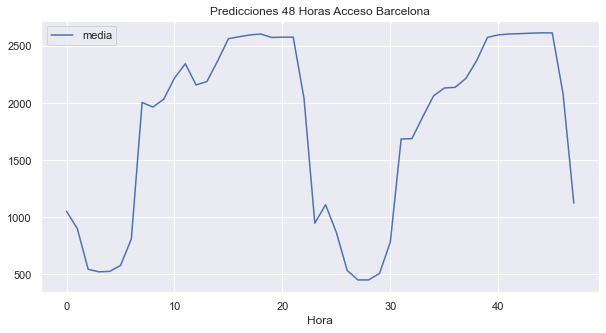

In [33]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 5))
#plt.margins(x=0,y=0)
sns.lineplot(data=data_pred_rf_101).set(title='Predicciones 48 Horas Acceso Barcelona')

In [34]:
#Medias tramo 101 31/12/2015
df_101 = dataML_tramos.loc[(dataML_tramos['año'] == 2015) & (dataML_tramos['mes'] == 12) & \
                                     (dataML_tramos['dia'].isin([30,31])) & (dataML_tramos['id_tramos'] == 101)]


#30/12/2021
new_row_0 = [2015, 12, 30,8,3,101,0,2987.000000]
new_row_1 = [2015, 12, 30,9,3,101,0,3223.000000]
new_row_2 = [2015, 12, 30,10,3,101,0,3558.450000]
new_row_3 = [2015, 12, 30,11,3,101,0,3127.750000]
new_row_4 = [2015, 12, 30,12,3,101,0,2872.333333]
new_row_5 = [2015, 12, 30,13,3,101,0,3284.333333]
new_row_6 = [2015, 12, 30,14,3,101,0,3456.750000]
new_row_7 = [2015, 12, 30,15,3,101,0,3108.000000]
new_row_8 = [2015, 12, 30,16,3,101,0,2804.750000]
new_row_9 = [2015, 12, 30,17,3,101,0,3043.500000]
new_row_10 = [2015, 12, 30,18,3,101,0,3464.000000]
new_row_11 = [2015, 12, 30,19,3,101,0,3766.750000]
new_row_12 = [2015, 12, 30,20,3,101,0,3024.750000]
new_row_13 = [2015, 12, 30,21,3,101,0,2731.750000]


#31/12/2021
new_row_14 = [2015, 12, 31,0,4,101,0,729.000000]
new_row_15 = [2015, 12, 31,3,4,101,0,322.000000]
new_row_16 = [2015, 12, 31,6,4,101,0,854.450000]
new_row_17 = [2015, 12, 31,7,4,101,0,1365.750000]
new_row_18 = [2015, 12, 31,11,4,101,0,3236.333333]
new_row_19 = [2015, 12, 31,12,4,101,0,3501.333333]
new_row_20 = [2015, 12, 31,13,4,101,0,3329.750000]
new_row_21 = [2015, 12, 31,14,4,101,0,3572.000000]
new_row_22 = [2015, 12, 31,15,4,101,0,3125.750000]
new_row_23 = [2015, 12, 31,18,4,101,0,3467.500000]
new_row_24 = [2015, 12, 31,19,4,101,0,3922.000000]
new_row_25 = [2015, 12, 31,20,4,101,0,2356.750000]
new_row_26 = [2015, 12, 31,21,4,101,0,1977.750000]

df_101.loc[len(df_101.index)] = new_row_0
df_101.loc[len(df_101.index)] = new_row_1
df_101.loc[len(df_101.index)] = new_row_2
df_101.loc[len(df_101.index)] = new_row_3
df_101.loc[len(df_101.index)] = new_row_4
df_101.loc[len(df_101.index)] = new_row_5
df_101.loc[len(df_101.index)] = new_row_6
df_101.loc[len(df_101.index)] = new_row_7
df_101.loc[len(df_101.index)] = new_row_8
df_101.loc[len(df_101.index)] = new_row_9
df_101.loc[len(df_101.index)] = new_row_10
df_101.loc[len(df_101.index)] = new_row_11
df_101.loc[len(df_101.index)] = new_row_12
df_101.loc[len(df_101.index)] = new_row_13
df_101.loc[len(df_101.index)] = new_row_14
df_101.loc[len(df_101.index)] = new_row_15
df_101.loc[len(df_101.index)] = new_row_16
df_101.loc[len(df_101.index)] = new_row_17
df_101.loc[len(df_101.index)] = new_row_18
df_101.loc[len(df_101.index)] = new_row_19
df_101.loc[len(df_101.index)] = new_row_20
df_101.loc[len(df_101.index)] = new_row_21
df_101.loc[len(df_101.index)] = new_row_22
df_101.loc[len(df_101.index)] = new_row_23
df_101.loc[len(df_101.index)] = new_row_24
df_101.loc[len(df_101.index)] = new_row_25
df_101.loc[len(df_101.index)] = new_row_26

df_sorted_101 = df_101.sort_values(['dia','horas'])
df_sorted_101_mean = df_sorted_101['media'].tolist()
df_sorted_101_mean

[826.0,
 541.3333333333334,
 342.75,
 254.66666666666663,
 193.0,
 354.0,
 976.0,
 2415.0,
 2987.0,
 3223.0,
 3558.45,
 3127.75,
 2872.333333,
 3284.333333,
 3456.75,
 3108.0,
 2804.75,
 3043.5,
 3464.0,
 3766.75,
 3024.75,
 2731.75,
 2446.5,
 1311.75,
 729.0,
 670.25,
 435.75,
 322.0,
 246.33333333333331,
 242.0,
 854.45,
 1365.75,
 2274.6666666666665,
 2700.0,
 2924.75,
 3236.333333,
 3501.333333,
 3329.75,
 3572.0,
 3125.75,
 2910.333333333333,
 3202.5,
 3467.5,
 3922.0,
 2356.75,
 1977.75,
 647.3333333333334,
 392.0]

In [35]:
df_dates_101 = dates_48.copy()
df_dates_101['Media'] = df_sorted_101_mean
df_dates_101.set_index('Fecha',inplace=True)
df_dates_101

,Media
Fecha,
2015-12-30 00:00:00,826.000000
2015-12-30 01:00:00,541.333333
2015-12-30 02:00:00,342.750000
2015-12-30 03:00:00,254.666667
2015-12-30 04:00:00,193.000000
2015-12-30 05:00:00,354.000000
2015-12-30 06:00:00,976.000000
2015-12-30 07:00:00,2415.000000
2015-12-30 08:00:00,2987.000000


In [36]:
df_pred_dates_101 = pred_dates_48.copy()
df_pred_dates_101['Media'] = new_predictions_101
df_pred_dates_101.set_index('Fecha',inplace=True)
df_pred_dates_101

,Media
Fecha,
2016-01-01 00:00:00,1051.591702
2016-01-01 01:00:00,899.832518
2016-01-01 02:00:00,544.723482
2016-01-01 03:00:00,522.251622
2016-01-01 04:00:00,526.238912
2016-01-01 05:00:00,577.626450
2016-01-01 06:00:00,809.700010
2016-01-01 07:00:00,2004.120722
2016-01-01 08:00:00,1963.904279


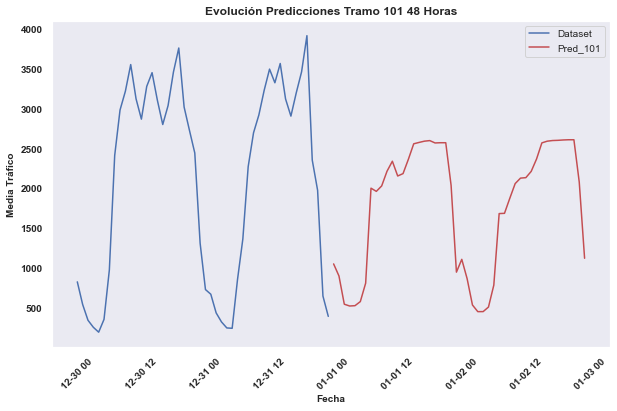

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(df_dates_101, linestyle='solid', color='b')
plt.plot(df_pred_dates_101, linestyle='solid', color='r')

plt.legend(['Dataset','Pred_101'], loc='best', prop={'size': 10})
plt.title('Evolución Predicciones Tramo 101 48 Horas', weight='bold', fontsize=12)
plt.ylabel('Media Tráfico', weight='bold', fontsize=10)
plt.xlabel('Fecha', weight='bold', fontsize=10)
plt.xticks(weight='bold', fontsize=10, rotation=45)
plt.yticks(weight='bold', fontsize=10)
plt.grid(color = 'y', linewidth='0.5')
plt.show()

**-------------------------------------------------------------------------------------------------------**
**-------------------------------------------------------------------------------------------------------**

Tramo 1027 48 horas

In [57]:
df_predRF_1027 = pd.DataFrame({'Actual': y_test, 'Predicción': pred_rf})
df_predRF_1027

,Actual,Predicción
4379,711.75,697.941400
393,987.75,1168.413192
1164,2671.25,2760.061539
4478,760.75,873.004632
731,2158.50,2111.815108
...,...,...
1652,2583.50,2586.925852
3291,795.00,2189.015813
3718,133.00,297.082982
1315,1082.50,488.823576


In [58]:
#Cargamos dataset preparado de predecciones
dataML_pred_tramos_1027 = pd.read_csv('/../TFM/Machine_Learning_Data/predictions/pred_data_sections_rolling_48_1027.csv',sep=';',engine='python')
dataML_pred_tramos_1027.head(5)

,año,mes,dia_mes,horas,dias_sem,id_tramos,festivo,media-24
0,2016,1,1,0,5,1027,1,1724.454647
1,2016,1,1,1,5,1027,1,1725.208972
2,2016,1,1,2,5,1027,1,1730.701811
3,2016,1,1,3,5,1027,1,1733.267968
4,2016,1,1,4,5,1027,1,1740.431346


In [59]:
#Predicciones 48 Horas
new_predictions_1027 = modelo_rf.predict(dataML_pred_tramos_1027[['mes','dia_mes','horas','dias_sem','festivo','media-24']])
new_predictions_1027

array([ 907.18099442,  844.35871849,  586.11256452,  508.78275912,
        507.39191471,  516.27808019,  664.62607838, 1048.60798159,
       1142.87969995, 1302.68979805, 1798.67879357, 2097.03799147,
       2193.45636537, 2238.69539281, 2230.79339766, 2142.25763444,
       2138.93189248, 2187.8884311 , 2631.14599743, 2633.675417  ,
       2633.675417  , 2649.93418694, 1897.30583558, 1013.91442809,
       1161.65755856, 1224.21667947,  608.73012021,  470.30672733,
        464.71652479,  468.86030799,  663.07560288, 1334.69860495,
       1271.1187795 , 1540.61212619, 2275.79064744, 2442.36014977,
       2478.84529491, 2481.60305039, 2461.20585619, 2319.77267793,
       2309.71921558, 2343.84973736, 2701.67239639, 2708.47767275,
       2708.47767275, 2708.47767275, 1991.29084875, 1436.32384383])

In [60]:
#unimos las predicciones con las horas
data_pred_rf_1027 = pd.DataFrame(new_predictions_1027,columns = ['media'])
data_pred_rf_1027.insert(loc=0, column='Hora', value=np.arange(len(data_pred_rf_1027)))
data_pred_rf_1027.set_index('Hora',inplace=True)


(data_pred_rf_1027
 .style
 .background_gradient(subset=['media'], cmap='Greens')
 .set_caption('Predicciones 48H Av.Ausias March'))

,media
Hora,
0,907.180994
1,844.358718
2,586.112565
3,508.782759
4,507.391915
5,516.278080
6,664.626078
7,1048.607982
8,1142.879700


In [61]:
media_RF_24_1027 = data_pred_rf_1027.mean()
print(media_RF_24_1027)

max_RF_24_1027 = data_pred_rf_1027.max()
print(max_RF_24_1027)

min_RF_24_1027 = data_pred_rf_1027.min()
print(min_RF_24_1027)

media    1689.41999
dtype: float64
media    2708.477673
dtype: float64
media    464.716525
dtype: float64


[Text(0.5, 1.0, 'Predicciones 48 Horas Av. Ausias March')]

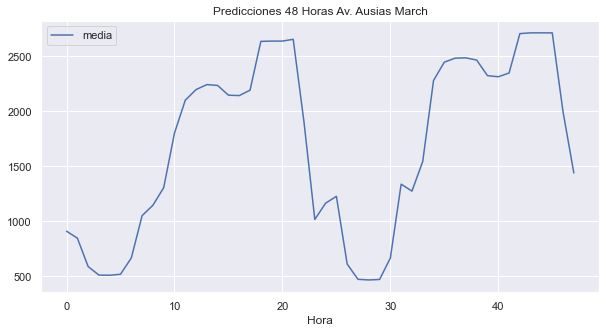

In [62]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 5))
sns.lineplot(data=data_pred_rf_1027).set(title='Predicciones 48 Horas Av. Ausias March')

In [63]:
#Medias tramo 1027 31/12/2015
df_before_1027 = dataML_tramos.loc[(dataML_tramos['año'] == 2015) & (dataML_tramos['mes'] == 12) & \
                                     (dataML_tramos['dia'].isin([30,31])) & (dataML_tramos['id_tramos'] == 1027)]


#30/12/2015
new_row_0 = [2015, 12, 30,9,3,1027,0,3343.500000]
new_row_1 = [2015, 12, 30,10,3,1027,0,3421.000000]
new_row_2 = [2015, 12, 30,11,3,1027,0,3367.500000]
new_row_3 = [2015, 12, 30,12,3,1027,0,2845.750000]
new_row_4 = [2015, 12, 30,13,3,1027,0,3001.333333]
new_row_5 = [2015, 12, 30,14,3,1027,0,3469.750000]
new_row_6 = [2015, 12, 30,15,3,1027,0,2904.000000]
new_row_7 = [2015, 12, 30,16,3,1027,0,2737.000000]
new_row_8 = [2015, 12, 30,17,3,1027,0,3090.750000]
new_row_9 = [2015, 12, 30,18,3,1027,0,3348.750000]
new_row_10 = [2015, 12, 30,19,3,1027,0,3672.000000]
new_row_11 = [2015, 12, 30,20,3,1027,0,3441.750000]



#31/12/2015
new_row_12 = [2015, 12, 31,0,4,1027,0,711.500000]
new_row_13 = [2015, 12, 31,3,4,1027,0,336.000000]
new_row_14 = [2015, 12, 31,6,4,1027,0,429.500000]
new_row_15 = [2015, 12, 31,7,4,1027,0,1002.750000]
new_row_16 = [2015, 12, 31,12,4,1027,0,3101.333333]
new_row_17 = [2015, 12, 31,13,4,1027,0,3458.750000]
new_row_18 = [2015, 12, 31,14,4,1027,0,3611.000000]
new_row_19 = [2015, 12, 31,19,4,1027,0,2729.000000]
new_row_20 = [2015, 12, 31,20,4,1027,0,2155.750000]
new_row_21 = [2015, 12, 31,21,4,1027,0,1533.750000]

df_before_1027.loc[len(df_before_1027.index)] = new_row_0
df_before_1027.loc[len(df_before_1027.index)] = new_row_1
df_before_1027.loc[len(df_before_1027.index)] = new_row_2
df_before_1027.loc[len(df_before_1027.index)] = new_row_3
df_before_1027.loc[len(df_before_1027.index)] = new_row_4
df_before_1027.loc[len(df_before_1027.index)] = new_row_5
df_before_1027.loc[len(df_before_1027.index)] = new_row_6
df_before_1027.loc[len(df_before_1027.index)] = new_row_7
df_before_1027.loc[len(df_before_1027.index)] = new_row_8
df_before_1027.loc[len(df_before_1027.index)] = new_row_9
df_before_1027.loc[len(df_before_1027.index)] = new_row_10
df_before_1027.loc[len(df_before_1027.index)] = new_row_11
df_before_1027.loc[len(df_before_1027.index)] = new_row_12
df_before_1027.loc[len(df_before_1027.index)] = new_row_13
df_before_1027.loc[len(df_before_1027.index)] = new_row_14
df_before_1027.loc[len(df_before_1027.index)] = new_row_15
df_before_1027.loc[len(df_before_1027.index)] = new_row_16
df_before_1027.loc[len(df_before_1027.index)] = new_row_17
df_before_1027.loc[len(df_before_1027.index)] = new_row_18
df_before_1027.loc[len(df_before_1027.index)] = new_row_19
df_before_1027.loc[len(df_before_1027.index)] = new_row_20
df_before_1027.loc[len(df_before_1027.index)] = new_row_21

df_sorted_1027 = df_before_1027.sort_values(['dia','horas'])
df_sorted_1027_mean = df_sorted_1027['media'].tolist()
df_sorted_1027_mean

[829.0,
 603.0,
 347.5,
 230.0,
 204.0,
 299.25,
 572.0,
 1655.0,
 2910.0,
 3343.5,
 3421.0,
 3367.5,
 2845.75,
 3001.333333,
 3469.75,
 2904.0,
 2737.0,
 3090.75,
 3348.75,
 3672.0,
 3441.75,
 3147.25,
 2168.75,
 1222.5,
 711.5,
 684.75,
 409.0,
 336.0,
 225.66666666666663,
 265.0,
 429.5,
 1002.75,
 1837.0,
 2108.0,
 2583.5,
 2896.5,
 3101.333333,
 3458.75,
 3611.0,
 2667.0,
 2334.0,
 2345.0,
 2483.0,
 2729.0,
 2155.75,
 1533.75,
 864.3333333333334,
 534.0]

In [64]:
df_dates_1027 = dates_48.copy()
df_dates_1027['Media'] = df_sorted_1027_mean
df_dates_1027.set_index('Fecha',inplace=True)
df_dates_1027

,Media
Fecha,
2015-12-30 00:00:00,829.000000
2015-12-30 01:00:00,603.000000
2015-12-30 02:00:00,347.500000
2015-12-30 03:00:00,230.000000
2015-12-30 04:00:00,204.000000
2015-12-30 05:00:00,299.250000
2015-12-30 06:00:00,572.000000
2015-12-30 07:00:00,1655.000000
2015-12-30 08:00:00,2910.000000


In [65]:
df_pred_dates_1027 = pred_dates_48.copy()
df_pred_dates_1027['Media'] = new_predictions_1027
df_pred_dates_1027.set_index('Fecha',inplace=True)
df_pred_dates_1027

,Media
Fecha,
2016-01-01 00:00:00,907.180994
2016-01-01 01:00:00,844.358718
2016-01-01 02:00:00,586.112565
2016-01-01 03:00:00,508.782759
2016-01-01 04:00:00,507.391915
2016-01-01 05:00:00,516.278080
2016-01-01 06:00:00,664.626078
2016-01-01 07:00:00,1048.607982
2016-01-01 08:00:00,1142.879700


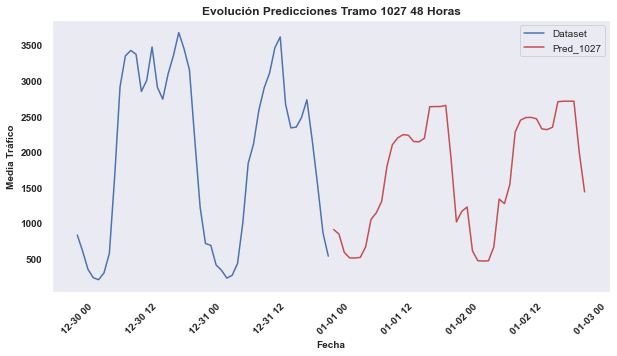

In [66]:
plt.figure(figsize=(10, 5))
plt.plot(df_dates_1027, linestyle='solid', color='b')
plt.plot(df_pred_dates_1027, linestyle='solid', color='r')

plt.legend(['Dataset','Pred_1027'], loc='best', prop={'size': 10})
plt.title('Evolución Predicciones Tramo 1027 48 Horas', weight='bold', fontsize=12)
plt.ylabel('Media Tráfico', weight='bold', fontsize=10)
plt.xlabel('Fecha', weight='bold', fontsize=10)
plt.xticks(weight='bold', fontsize=10, rotation=45)
plt.yticks(weight='bold', fontsize=10)
plt.grid(color = 'y', linewidth='0.5')
plt.show()

**-------------------------------------------------------------------------------------------------------**
**-------------------------------------------------------------------------------------------------------**

Tramo 1069 48 horas

In [86]:
df_predRF_1069 = pd.DataFrame({'Actual': y_test, 'Predicción': pred_rf})
df_predRF_1069

,Actual,Predicción
5223,2460.666667,2326.098787
3053,1835.000000,2149.027199
5329,327.500000,401.197725
3698,1996.750000,334.943629
3973,116.500000,374.285571
...,...,...
307,306.250000,627.528848
4078,1703.500000,2320.600114
3312,1432.500000,1837.575728
6808,337.750000,402.487649


In [87]:
#Cargamos dataset preparado de predecciones
dataML_pred_tramos_1069 = pd.read_csv('/../TFM/Machine_Learning_Data/predictions/pred_data_sections_rolling_48_1069.csv',sep=';',engine='python')
dataML_pred_tramos_1069.head(5)

,año,mes,dia_mes,horas,dias_sem,id_tramos,festivo,media-24
0,2016,1,1,0,5,1069,1,1408.407756
1,2016,1,1,1,5,1069,1,1413.910801
2,2016,1,1,2,5,1069,1,1418.255455
3,2016,1,1,3,5,1069,1,1425.230036
4,2016,1,1,4,5,1069,1,1435.218507


In [88]:
#Predicciones 48 Horas
new_predictions_1069 = modelo_rf.predict(dataML_pred_tramos_1069[['mes','dia_mes','horas','dias_sem','festivo','media-24']])
new_predictions_1069

array([ 693.9256545 ,  675.03445727,  347.59146084,  342.71823886,
        341.55056043,  345.51486223,  654.04427688,  809.35197453,
       1566.30771105, 1589.26511961, 1640.92748958, 1904.56360747,
       1843.08656515, 1842.70422424, 1819.00123217, 1812.14132403,
       1812.14132403, 1850.79018117, 1866.96596877, 1866.96596877,
       1866.96596877, 1885.75045676, 1288.1154404 , 1148.99134722,
        707.97643082,  631.46728833,  365.82663155,  362.11690465,
        362.11690465,  365.86178186,  631.94619413,  656.78564553,
       1506.48386958, 1513.93075441, 1466.04754777, 2060.7470193 ,
       2084.16345396, 2062.91672319, 2050.69428656, 2009.76527805,
       2016.71274558, 2058.72229327, 2192.95119781, 2217.33598795,
       2218.05575723, 2162.88624731, 1562.72606301, 1254.39714353])

In [89]:
#unimos las predicciones con las horas
data_pred_rf_1069 = pd.DataFrame(new_predictions_1069,columns = ['media'])
data_pred_rf_1069.insert(loc=0, column='Hora', value=np.arange(len(data_pred_rf_1069)))
data_pred_rf_1069.set_index('Hora',inplace=True)


(data_pred_rf_1069
 .style
 .background_gradient(subset=['media'], cmap='Greens')
 .set_caption('Predicciones 48H Av.del Cid'))

,media
Hora,
0,693.925655
1,675.034457
2,347.591461
3,342.718239
4,341.550560
5,345.514862
6,654.044277
7,809.351975
8,1566.307711


In [90]:
media_RF_24_1069 = data_pred_rf_1069.mean()
print(media_RF_24_1069)

max_RF_24_1069 = data_pred_rf_1069.max()
print(max_RF_24_1069)

min_RF_24_1069 = data_pred_rf_1069.min()
print(min_RF_24_1069)

media    1382.021866
dtype: float64
media    2218.055757
dtype: float64
media    341.55056
dtype: float64


[Text(0.5, 1.0, 'Predicciones 48 Horas Av. del Cid')]

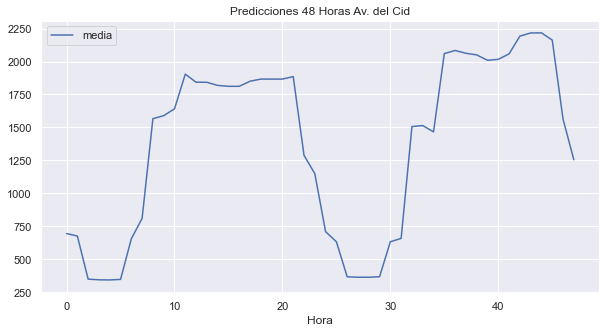

In [91]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 5))
sns.lineplot(data=data_pred_rf_1069).set(title='Predicciones 48 Horas Av. del Cid')

In [92]:
#Medias tramo 1069 31/12/2015
df_before_1069 = dataML_tramos.loc[(dataML_tramos['año'] == 2015) & (dataML_tramos['mes'] == 12) & \
                                     (dataML_tramos['dia'].isin([30,31])) & (dataML_tramos['id_tramos'] == 1069)]
df_before_1069

,año,mes,dia,horas,dias_sem,id_tramos,festivo,media
2992788,2015,12,30,0,3,1069,0,659.000000
2993187,2015,12,30,1,3,1069,0,443.666667
2993587,2015,12,30,2,3,1069,0,255.250000
2993989,2015,12,30,3,3,1069,0,149.000000
2994387,2015,12,30,4,3,1069,0,142.750000
2994787,2015,12,30,5,3,1069,0,222.000000
2995187,2015,12,30,6,3,1069,0,482.000000
2995580,2015,12,30,7,3,1069,0,1278.000000
2995977,2015,12,30,8,3,1069,0,2510.000000
2996358,2015,12,30,9,3,1069,0,2916.000000


In [93]:
#30/12/2015
new_row_0 = [2015, 12, 30,14,3,1069,0,3327.500000]
new_row_1 = [2015, 12, 30,19,3,1069,0,3472.000000]

#31/12/2015
new_row_2 = [2015, 12, 31,0,4,1069,0,643.500000]
new_row_3 = [2015, 12, 31,3,4,1069,0,224.000000]
new_row_4 = [2015, 12, 31,6,4,1069,0,335.500000]
new_row_5 = [2015, 12, 31,7,4,1069,0,993.750000]
new_row_6 = [2015, 12, 31,14,4,1069,0,2587.000000]
new_row_7 = [2015, 12, 31,19,4,1069,0,2123.000000]
new_row_8 = [2015, 12, 31,20,4,1069,0,1748.750000]
new_row_9 = [2015, 12, 31,21,4,1069,0,1273.000000]

df_before_1069.loc[len(df_before_1069.index)] = new_row_0
df_before_1069.loc[len(df_before_1069.index)] = new_row_1
df_before_1069.loc[len(df_before_1069.index)] = new_row_2
df_before_1069.loc[len(df_before_1069.index)] = new_row_3
df_before_1069.loc[len(df_before_1069.index)] = new_row_4
df_before_1069.loc[len(df_before_1069.index)] = new_row_5
df_before_1069.loc[len(df_before_1069.index)] = new_row_6
df_before_1069.loc[len(df_before_1069.index)] = new_row_7
df_before_1069.loc[len(df_before_1069.index)] = new_row_8
df_before_1069.loc[len(df_before_1069.index)] = new_row_9

df_sorted_1069 = df_before_1069.sort_values(['dia','horas'])
df_sorted_1069_mean = df_sorted_1069['media'].tolist()
df_sorted_1069_mean

[659.0,
 443.6666666666667,
 255.25,
 149.0,
 142.75,
 222.0,
 482.0,
 1278.0,
 2510.0,
 2916.0,
 2884.0,
 2882.333333333333,
 3146.0,
 3173.0,
 3327.5,
 2673.0,
 2638.5,
 2903.0,
 3163.0,
 3472.0,
 2890.5,
 2331.5,
 1747.25,
 890.25,
 643.5,
 578.5,
 290.5,
 224.0,
 151.66666666666666,
 169.0,
 335.5,
 993.75,
 1755.6666666666667,
 1907.0,
 2368.75,
 2432.75,
 2801.75,
 2905.0,
 2587.0,
 2101.25,
 1692.3333333333333,
 1711.5,
 1728.0,
 2123.0,
 1748.75,
 1273.0,
 686.3333333333334,
 524.0]

In [94]:
df_dates_1069 = dates_48.copy()
df_dates_1069['Media'] = df_sorted_1069_mean
df_dates_1069.set_index('Fecha',inplace=True)
df_dates_1069

,Media
Fecha,
2015-12-30 00:00:00,659.000000
2015-12-30 01:00:00,443.666667
2015-12-30 02:00:00,255.250000
2015-12-30 03:00:00,149.000000
2015-12-30 04:00:00,142.750000
2015-12-30 05:00:00,222.000000
2015-12-30 06:00:00,482.000000
2015-12-30 07:00:00,1278.000000
2015-12-30 08:00:00,2510.000000


In [95]:
df_pred_dates_1069 = pred_dates_48.copy()
df_pred_dates_1069['Media'] = new_predictions_1069
df_pred_dates_1069.set_index('Fecha',inplace=True)
df_pred_dates_1069

,Media
Fecha,
2016-01-01 00:00:00,693.925655
2016-01-01 01:00:00,675.034457
2016-01-01 02:00:00,347.591461
2016-01-01 03:00:00,342.718239
2016-01-01 04:00:00,341.550560
2016-01-01 05:00:00,345.514862
2016-01-01 06:00:00,654.044277
2016-01-01 07:00:00,809.351975
2016-01-01 08:00:00,1566.307711


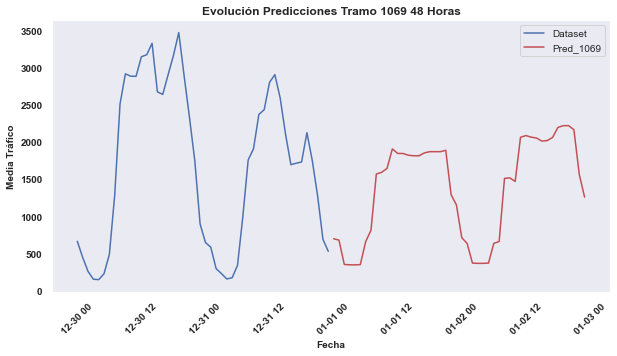

In [96]:
plt.figure(figsize=(10, 5))
plt.plot(df_dates_1069, linestyle='solid', color='b')
plt.plot(df_pred_dates_1069, linestyle='solid', color='r')

plt.legend(['Dataset','Pred_1069'], loc='best', prop={'size': 10})
plt.title('Evolución Predicciones Tramo 1069 48 Horas', weight='bold', fontsize=12)
plt.ylabel('Media Tráfico', weight='bold', fontsize=10)
plt.xlabel('Fecha', weight='bold', fontsize=10)
plt.xticks(weight='bold', fontsize=10, rotation=45)
plt.yticks(weight='bold', fontsize=10)
plt.grid(color = 'y', linewidth='0.5')
plt.show()

**-------------------------------------------------------------------------------------------------------**
**-------------------------------------------------------------------------------------------------------**

Tramo 1082 48 horas

In [116]:
df_predRF_1082 = pd.DataFrame({'Actual': y_test, 'Predicción': pred_rf})
df_predRF_1082

,Actual,Predicción
2447,141.333333,417.454712
3712,136.000000,199.780258
1964,2266.750000,1388.685451
2554,2882.250000,2470.184195
1694,1783.000000,1867.938272
...,...,...
460,1272.000000,1480.137285
1067,1272.000000,923.341202
87,2339.666667,2674.744689
282,129.666667,233.230005


In [117]:
#Cargamos dataset preparado de predecciones
dataML_pred_tramos_1082 = pd.read_csv('/../TFM/Machine_Learning_Data/predictions/pred_data_sections_rolling_48_1082.csv',sep=';',engine='python')
dataML_pred_tramos_1082.head(5)

,año,mes,dia_mes,horas,dias_sem,id_tramos,festivo,media-24
0,2016,1,1,0,5,1082,1,1956.696760
1,2016,1,1,1,5,1082,1,1979.460593
2,2016,1,1,2,5,1082,1,1976.487413
3,2016,1,1,3,5,1082,1,1973.845288
4,2016,1,1,4,5,1082,1,1978.133326


In [118]:
#Predicciones 48 Horas
new_predictions_1082 = modelo_rf.predict(dataML_pred_tramos_1082[['mes','dia_mes','horas','dias_sem','festivo','media-24']])
new_predictions_1082

array([1558.99156673, 1690.05920331, 1233.95759808, 1082.04538338,
       1037.19670987, 1042.5435563 ,  906.30526006, 1477.30116175,
       1377.80053845, 1619.22627727, 2119.20716209, 2468.74591799,
       2507.7860842 , 2498.14613976, 2477.64214365, 2406.74781597,
       2351.07959178, 2341.98368748, 2453.89788673, 2467.08641336,
       2470.71558003, 2475.30600063, 2520.87023601, 1350.56264631,
       1956.95631663, 1671.2409052 ,  835.19606442,  431.39750537,
        377.33728638,  377.33728638,  619.34341576, 1539.87306753,
       1269.69420411, 1531.39372289, 1726.16937252, 2396.669808  ,
       2396.669808  , 2408.14420699, 2408.14420699, 2308.07473611,
       2288.99853774, 2406.98364398, 2518.59277484, 2537.06458299,
       2553.34787961, 2557.93830021, 2564.07862813, 1395.97915248])

In [119]:
#unimos las predicciones con las horas
data_pred_rf_1082 = pd.DataFrame(new_predictions_1082,columns = ['media'])
data_pred_rf_1082.insert(loc=0, column='Hora', value=np.arange(len(data_pred_rf_1082)))
data_pred_rf_1082.set_index('Hora',inplace=True)


(data_pred_rf_1082
 .style
 .background_gradient(subset=['media'], cmap='Greens')
 .set_caption('Predicciones 48H  Av.Cortes Valencianas'))

,media
Hora,
0,1558.991567
1,1690.059203
2,1233.957598
3,1082.045383
4,1037.196710
5,1042.543556
6,906.305260
7,1477.301162
8,1377.800538


In [120]:
media_RF_24_1082 = data_pred_rf_1082.mean()
print(media_RF_24_1082)

max_RF_24_1082 = data_pred_rf_1082.max()
print(max_RF_24_1082)

min_RF_24_1082 = data_pred_rf_1082.min()
print(min_RF_24_1082)

media    1854.413124
dtype: float64
media    2564.078628
dtype: float64
media    377.337286
dtype: float64


[Text(0.5, 1.0, 'Predicciones 48 Horas Av. Cortes Valencianas')]

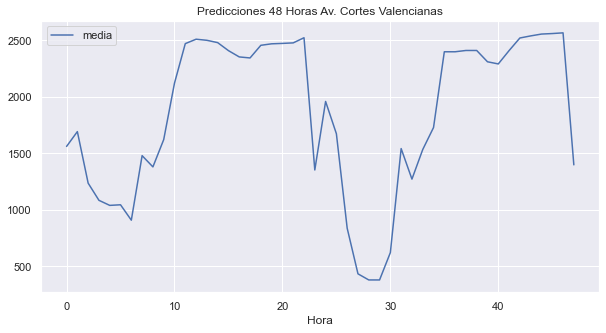

In [121]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 5))
sns.lineplot(data=data_pred_rf_1082).set(title='Predicciones 48 Horas Av. Cortes Valencianas')

In [122]:
#Medias tramo 1082 31/12/2015
df_before_1082 = dataML_tramos.loc[(dataML_tramos['año'] == 2015) & (dataML_tramos['mes'] == 12) & \
                                     (dataML_tramos['dia'].isin([30,31])) & (dataML_tramos['id_tramos'] == 1082)]
df_before_1082

,año,mes,dia,horas,dias_sem,id_tramos,festivo,media
2992799,2015,12,30,0,3,1082,0,1330.000000
2993198,2015,12,30,1,3,1082,0,940.000000
2993598,2015,12,30,2,3,1082,0,573.500000
2994000,2015,12,30,3,3,1082,0,285.666667
2994398,2015,12,30,4,3,1082,0,198.250000
2994798,2015,12,30,5,3,1082,0,224.250000
2995198,2015,12,30,6,3,1082,0,477.000000
2995591,2015,12,30,7,3,1082,0,1788.333333
3001484,2015,12,30,23,3,1082,0,1845.000000
3001886,2015,12,31,1,4,1082,0,1028.250000


In [123]:
#30/12/2015
new_row_0 = [2015, 12, 30,8,3,1082,0,2133.500000]
new_row_1 = [2015, 12, 30,9,3,1082,0,2841.500000]
new_row_2 = [2015, 12, 30,10,3,1082,0,3124.000000]
new_row_3 = [2015, 12, 30,11,3,1082,0,3361.500000]
new_row_4 = [2015, 12, 30,12,3,1082,0,2889.750000]
new_row_5 = [2015, 12, 30,13,3,1082,0,3033.333333]
new_row_6 = [2015, 12, 30,14,3,1082,0,3523.750000]
new_row_7 = [2015, 12, 30,15,3,1082,0,3115.000000]
new_row_8 = [2015, 12, 30,16,3,1082,0,2812.000000]
new_row_9 = [2015, 12, 30,17,3,1082,0,3144.750000]
new_row_10 = [2015, 12, 30,18,3,1082,0,3479.750000]
new_row_11 = [2015, 12, 30,19,3,1082,0,3775.000000]
new_row_12 = [2015, 12, 30,20,3,1082,0,3562.750000]
new_row_13 = [2015, 12, 30,21,3,1082,0,2960.000000]
new_row_14 = [2015, 12, 30,22,3,1082,0,2248.750000]


#31/12/2015
new_row_15 = [2015, 12, 31,0,4,1082,0,1173.500000]
new_row_16 = [2015, 12, 31,3,4,1082,0,429.000000]
new_row_17 = [2015, 12, 31,6,4,1082,0,335.500000]
new_row_18 = [2015, 12, 31,7,4,1082,0,1127.750000]
new_row_19 = [2015, 12, 31,10,4,1082,0,3258.000000]
new_row_20 = [2015, 12, 31,11,4,1082,0,3567.000000]
new_row_21 = [2015, 12, 31,12,4,1082,0,2932.750000]
new_row_22 = [2015, 12, 31,13,4,1082,0,3076.000000]
new_row_23 = [2015, 12, 31,14,4,1082,0,3239.000000]
new_row_24 = [2015, 12, 31,15,4,1082,0,2715.500000]
new_row_25 = [2015, 12, 31,18,4,1082,0,3345.000000]
new_row_26 = [2015, 12, 31,19,4,1082,0,2892.000000]
new_row_27 = [2015, 12, 31,20,4,1082,0,1934.500000]
new_row_28 = [2015, 12, 31,21,4,1082,0,1297.500000]

df_before_1082.loc[len(df_before_1082.index)] = new_row_0
df_before_1082.loc[len(df_before_1082.index)] = new_row_1
df_before_1082.loc[len(df_before_1082.index)] = new_row_2
df_before_1082.loc[len(df_before_1082.index)] = new_row_3
df_before_1082.loc[len(df_before_1082.index)] = new_row_4
df_before_1082.loc[len(df_before_1082.index)] = new_row_5
df_before_1082.loc[len(df_before_1082.index)] = new_row_6
df_before_1082.loc[len(df_before_1082.index)] = new_row_7
df_before_1082.loc[len(df_before_1082.index)] = new_row_8
df_before_1082.loc[len(df_before_1082.index)] = new_row_9
df_before_1082.loc[len(df_before_1082.index)] = new_row_10
df_before_1082.loc[len(df_before_1082.index)] = new_row_11
df_before_1082.loc[len(df_before_1082.index)] = new_row_12
df_before_1082.loc[len(df_before_1082.index)] = new_row_13
df_before_1082.loc[len(df_before_1082.index)] = new_row_14
df_before_1082.loc[len(df_before_1082.index)] = new_row_15
df_before_1082.loc[len(df_before_1082.index)] = new_row_16
df_before_1082.loc[len(df_before_1082.index)] = new_row_17
df_before_1082.loc[len(df_before_1082.index)] = new_row_18
df_before_1082.loc[len(df_before_1082.index)] = new_row_19
df_before_1082.loc[len(df_before_1082.index)] = new_row_20
df_before_1082.loc[len(df_before_1082.index)] = new_row_21
df_before_1082.loc[len(df_before_1082.index)] = new_row_22
df_before_1082.loc[len(df_before_1082.index)] = new_row_23
df_before_1082.loc[len(df_before_1082.index)] = new_row_24
df_before_1082.loc[len(df_before_1082.index)] = new_row_25
df_before_1082.loc[len(df_before_1082.index)] = new_row_26
df_before_1082.loc[len(df_before_1082.index)] = new_row_27
df_before_1082.loc[len(df_before_1082.index)] = new_row_28

df_sorted_1082 = df_before_1082.sort_values(['dia','horas'])
df_sorted_1082_mean = df_sorted_1082['media'].tolist()
df_sorted_1082_mean

[1330.0,
 940.0,
 573.5,
 285.6666666666667,
 198.25,
 224.25,
 477.0,
 1788.3333333333333,
 2133.5,
 2841.5,
 3124.0,
 3361.5,
 2889.75,
 3033.333333,
 3523.75,
 3115.0,
 2812.0,
 3144.75,
 3479.75,
 3775.0,
 3562.75,
 2960.0,
 2248.75,
 1845.0,
 1173.5,
 1028.25,
 604.5,
 429.0,
 255.0,
 176.0,
 335.5,
 1127.75,
 2356.6666666666665,
 2942.0,
 3258.0,
 3567.0,
 2932.75,
 3076.0,
 3239.0,
 2715.5,
 3101.6666666666665,
 3238.0,
 3345.0,
 2892.0,
 1934.5,
 1297.5,
 1024.3333333333333,
 646.0]

In [124]:
df_dates_1082 = dates_48.copy()
df_dates_1082['Media'] = df_sorted_1082_mean
df_dates_1082.set_index('Fecha',inplace=True)
df_dates_1082

,Media
Fecha,
2015-12-30 00:00:00,1330.000000
2015-12-30 01:00:00,940.000000
2015-12-30 02:00:00,573.500000
2015-12-30 03:00:00,285.666667
2015-12-30 04:00:00,198.250000
2015-12-30 05:00:00,224.250000
2015-12-30 06:00:00,477.000000
2015-12-30 07:00:00,1788.333333
2015-12-30 08:00:00,2133.500000


In [125]:
df_pred_dates_1082 = pred_dates_48.copy()
df_pred_dates_1082['Media'] = new_predictions_1082
df_pred_dates_1082.set_index('Fecha',inplace=True)
df_pred_dates_1082

,Media
Fecha,
2016-01-01 00:00:00,1558.991567
2016-01-01 01:00:00,1690.059203
2016-01-01 02:00:00,1233.957598
2016-01-01 03:00:00,1082.045383
2016-01-01 04:00:00,1037.196710
2016-01-01 05:00:00,1042.543556
2016-01-01 06:00:00,906.305260
2016-01-01 07:00:00,1477.301162
2016-01-01 08:00:00,1377.800538


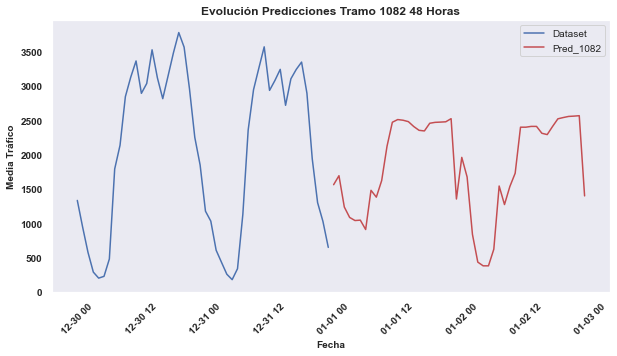

In [126]:
plt.figure(figsize=(10, 5))
plt.plot(df_dates_1082, linestyle='solid', color='b')
plt.plot(df_pred_dates_1082, linestyle='solid', color='r')

plt.legend(['Dataset','Pred_1082'], loc='best', prop={'size': 10})
plt.title('Evolución Predicciones Tramo 1082 48 Horas', weight='bold', fontsize=12)
plt.ylabel('Media Tráfico', weight='bold', fontsize=10)
plt.xlabel('Fecha', weight='bold', fontsize=10)
plt.xticks(weight='bold', fontsize=10, rotation=45)
plt.yticks(weight='bold', fontsize=10)
plt.grid(color = 'y', linewidth='0.5')
plt.show()

**-------------------------------------------------------------------------------------------------------**
**-------------------------------------------------------------------------------------------------------**

Tramo 10357 48 horas

In [146]:
df_predRF_10357 = pd.DataFrame({'Actual': y_test, 'Predicción': pred_rf})
df_predRF_10357

,Actual,Predicción
2389,260.000000,386.292688
3034,318.333333,330.106929
6000,2458.250000,2075.121190
5351,806.666667,1025.927762
5477,2902.000000,2413.073389
...,...,...
2117,2550.250000,2383.957281
4017,1163.000000,435.336696
5839,2355.000000,2059.230379
4617,2736.000000,2378.866082


In [147]:
#Cargamos dataset preparado de predecciones
dataML_pred_tramos_10357 = pd.read_csv('/../TFM/Machine_Learning_Data/predictions/pred_data_sections_rolling_48_10357.csv',sep=';',engine='python')
dataML_pred_tramos_10357.head(5)

,año,mes,dia_mes,horas,dias_sem,id_tramos,festivo,media-24
0,2016,1,1,0,5,10357,1,1032.697234
1,2016,1,1,1,5,10357,1,1067.171938
2,2016,1,1,2,5,10357,1,1082.865431
3,2016,1,1,3,5,10357,1,1095.412680
4,2016,1,1,4,5,10357,1,1110.390485


In [148]:
#Predicciones 24 Horas
new_predictions_10357 = modelo_rf.predict(dataML_pred_tramos_10357[['mes','dia_mes','horas','dias_sem','festivo','media-24']])
new_predictions_10357

array([1186.27673894, 1227.30423561,  591.34497173,  484.1418128 ,
        484.1418128 ,  486.05382264,  501.86235075,  602.38122151,
       1084.43081428, 1053.53928776, 1435.1007476 , 1483.9428678 ,
       1840.48817017, 1857.79408896, 1851.77399817, 1831.99984572,
       1792.44223936, 1933.88141481, 2014.05794098, 2024.63499844,
       2056.8638624 , 1711.40979191,  918.55731111,  562.15355462,
        640.88446477,  533.23041939,  359.48812983,  349.52238273,
        341.49952559,  349.61753739,  366.05952793,  567.98744564,
        881.77755383,  833.81769429, 1280.07558082, 1625.38235229,
       2050.39928412, 2048.23029576, 2052.30420806, 1939.501416  ,
       1883.61828909, 1994.99132508, 2172.79802651, 2176.3088021 ,
       2219.57264667, 1741.84377677,  921.89980629,  552.57338583])

In [149]:
#unimos las predicciones con las horas
data_pred_rf_10357 = pd.DataFrame(new_predictions_10357,columns = ['media'])
data_pred_rf_10357.insert(loc=0, column='Hora', value=np.arange(len(data_pred_rf_10357)))
data_pred_rf_10357.set_index('Hora',inplace=True)

#background_gradient: https://matplotlib.org/stable/tutorials/colors/colormaps.html

(data_pred_rf_10357
 .style
 .background_gradient(subset=['media'], cmap='Greens')
 .set_caption('Predicciones 48H  Plaza Ayuntamiento'))

,media
Hora,
0,1186.276739
1,1227.304236
2,591.344972
3,484.141813
4,484.141813
5,486.053823
6,501.862351
7,602.381222
8,1084.430814


In [150]:
media_RF_48_10357 = data_pred_rf_10357.mean()
print(media_RF_48_10357)

max_RF_48_10357 = data_pred_rf_10357.max()
print(max_RF_48_10357)

min_RF_48_10357 = data_pred_rf_10357.min()
print(min_RF_48_10357)

media    1268.749204
dtype: float64
media    2219.572647
dtype: float64
media    341.499526
dtype: float64


[Text(0.5, 1.0, 'Predicciones 48 Horas Plz. Ayuntamiento')]

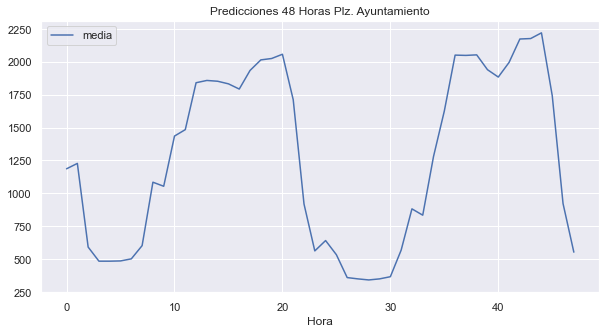

In [151]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 5))
sns.lineplot(data=data_pred_rf_10357).set(title='Predicciones 48 Horas Plz. Ayuntamiento')

In [152]:
#Medias tramo 10357 31/12/2015
df_before_10357 = dataML_tramos.loc[(dataML_tramos['año'] == 2015) & (dataML_tramos['mes'] == 12) & \
                                     (dataML_tramos['dia'].isin([30,31])) & (dataML_tramos['id_tramos'] == 10357)]
df_before_10357

,año,mes,dia,horas,dias_sem,id_tramos,festivo,media
2993063,2015,12,30,0,3,10357,0,538.000000
2993463,2015,12,30,1,3,10357,0,295.666667
2993865,2015,12,30,2,3,10357,0,196.250000
2994263,2015,12,30,3,3,10357,0,130.333333
2994663,2015,12,30,4,3,10357,0,104.750000
2995063,2015,12,30,5,3,10357,0,162.250000
2995458,2015,12,30,6,3,10357,0,323.000000
2995858,2015,12,30,7,3,10357,0,817.000000
2996245,2015,12,30,8,3,10357,0,1864.000000
2996619,2015,12,30,9,3,10357,0,2005.000000


In [153]:
new_row_0 = [2015, 12, 31,0,4,1082,0,476.500000]
new_row_1 = [2015, 12, 31,3,4,1082,0,201.000000]
new_row_2 = [2015, 12, 31,6,4,1082,0,333.500000]
new_row_3 = [2015, 12, 31,7,4,1082,0,825.750000]
new_row_4 = [2015, 12, 31,14,4,1082,0,2147.000000]
new_row_5 = [2015, 12, 31,19,4,1082,0,1239.000000]
new_row_6 = [2015, 12, 31,20,4,1082,0,976.750000]
new_row_7 = [2015, 12, 31,21,4,1082,0,534.000000]


df_before_10357.loc[len(df_before_10357.index)] = new_row_0
df_before_10357.loc[len(df_before_10357.index)] = new_row_1
df_before_10357.loc[len(df_before_10357.index)] = new_row_2
df_before_10357.loc[len(df_before_10357.index)] = new_row_3
df_before_10357.loc[len(df_before_10357.index)] = new_row_4
df_before_10357.loc[len(df_before_10357.index)] = new_row_5
df_before_10357.loc[len(df_before_10357.index)] = new_row_6
df_before_10357.loc[len(df_before_10357.index)] = new_row_7

df_sorted_10357= df_before_10357.sort_values(['dia','horas'])
df_sorted_10357_mean = df_sorted_10357['media'].tolist()
df_sorted_10357_mean

[538.0,
 295.6666666666667,
 196.25,
 130.33333333333334,
 104.75,
 162.25,
 323.0,
 817.0,
 1864.0,
 2005.0,
 2065.0,
 2185.6666666666665,
 2282.0,
 2563.333333333333,
 2795.5,
 2357.5,
 2259.0,
 1981.0,
 2911.6666666666665,
 2938.5,
 2298.5,
 1876.75,
 1245.25,
 615.0,
 476.5,
 369.75,
 224.75,
 201.0,
 142.66666666666666,
 155.0,
 333.5,
 825.75,
 1025.0,
 1141.0,
 1379.0,
 1650.0,
 2021.0,
 2232.0,
 2147.0,
 1765.0,
 1470.0,
 1400.25,
 1511.0,
 1239.0,
 976.75,
 534.0,
 473.0,
 393.0]

In [154]:
df_dates_10357 = dates_48.copy()
df_dates_10357['Media'] = df_sorted_10357_mean
df_dates_10357.set_index('Fecha',inplace=True)
df_dates_10357

,Media
Fecha,
2015-12-30 00:00:00,538.000000
2015-12-30 01:00:00,295.666667
2015-12-30 02:00:00,196.250000
2015-12-30 03:00:00,130.333333
2015-12-30 04:00:00,104.750000
2015-12-30 05:00:00,162.250000
2015-12-30 06:00:00,323.000000
2015-12-30 07:00:00,817.000000
2015-12-30 08:00:00,1864.000000


In [155]:
df_pred_dates_10357 = pred_dates_48.copy()
df_pred_dates_10357['Media'] = new_predictions_10357
df_pred_dates_10357.set_index('Fecha',inplace=True)
df_pred_dates_10357

,Media
Fecha,
2016-01-01 00:00:00,1186.276739
2016-01-01 01:00:00,1227.304236
2016-01-01 02:00:00,591.344972
2016-01-01 03:00:00,484.141813
2016-01-01 04:00:00,484.141813
2016-01-01 05:00:00,486.053823
2016-01-01 06:00:00,501.862351
2016-01-01 07:00:00,602.381222
2016-01-01 08:00:00,1084.430814


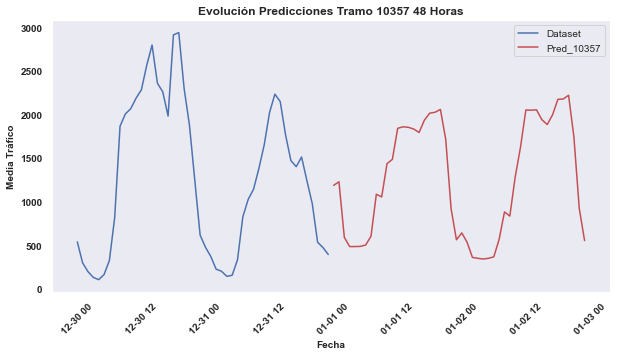

In [156]:
plt.figure(figsize=(10, 5))
plt.plot(df_dates_10357, linestyle='solid', color='b')
plt.plot(df_pred_dates_10357, linestyle='solid', color='r')

plt.legend(['Dataset','Pred_10357'], loc='best', prop={'size': 10})
plt.title('Evolución Predicciones Tramo 10357 48 Horas', weight='bold', fontsize=12)
plt.ylabel('Media Tráfico', weight='bold', fontsize=10)
plt.xlabel('Fecha', weight='bold', fontsize=10)
plt.xticks(weight='bold', fontsize=10, rotation=45)
plt.yticks(weight='bold', fontsize=10)
plt.grid(color = 'y', linewidth='0.5')
plt.show()

**-------------------------------------------------------------------------------------------------------**
**-------------------------------------------------------------------------------------------------------**

Tramo 107 48 horas

In [176]:
df_predRF_107 = pd.DataFrame({'Actual': y_test, 'Predicción': pred_rf})
df_predRF_107

,Actual,Predicción
6666,1334.000000,1210.980654
5409,1730.000000,1450.082945
4766,1821.250000,1553.635860
7219,1129.250000,1193.700778
6315,1500.500000,1403.029581
...,...,...
3742,533.500000,630.536033
4022,1664.750000,1629.592078
2647,1471.333333,1403.029581
5523,1249.000000,1375.493683


In [177]:
#Cargamos dataset preparado de predecciones
dataML_pred_tramos_107 = pd.read_csv('/../TFM/Machine_Learning_Data/predictions/pred_data_sections_rolling_48_107.csv',sep=';',engine='python')
dataML_pred_tramos_107.head(5)

,año,mes,dia_mes,horas,dias_sem,id_tramos,festivo,media-24
0,2016,1,1,0,5,107,1,696.892912
1,2016,1,1,1,5,107,1,704.849240
2,2016,1,1,2,5,107,1,704.415127
3,2016,1,1,3,5,107,1,708.614903
4,2016,1,1,4,5,107,1,714.689680


In [178]:
#Predicciones 48 Horas
new_predictions_107 = modelo_rf.predict(dataML_pred_tramos_107[['mes','dia_mes','horas','dias_sem','festivo','media-24']])
new_predictions_107

array([ 552.81279886,  530.6758393 ,  245.74203443,  227.39421962,
        227.39421962,  227.39421962,  227.43010638,  449.06869383,
        501.74014246,  535.33009242,  609.96376964,  816.15278092,
       1047.03344666, 1052.4331529 , 1016.15440568,  776.01518872,
        656.42127412, 1086.78824154, 1321.53004286, 1353.39546016,
       1340.54001425, 1291.12455093,  859.06023074,  471.34488572,
        702.93329196,  694.98740904,  333.48490036,  255.22853143,
        249.92316865,  252.42892845,  257.7268917 ,  359.99937294,
        387.84151685,  399.19578408,  462.38004386,  772.08565664,
        986.02723862, 1025.05277911, 1027.93013672,  999.45808226,
       1001.26736888, 1202.88012086, 1331.59145468, 1371.61891597,
       1374.88611041, 1358.34581879,  862.22275266,  503.96961048])

In [179]:
#unimos las predicciones con las horas
data_pred_rf_107 = pd.DataFrame(new_predictions_107,columns = ['media'])
data_pred_rf_107.insert(loc=0, column='Hora', value=np.arange(len(data_pred_rf_107)))
data_pred_rf_107.set_index('Hora',inplace=True)


(data_pred_rf_107
 .style
 .background_gradient(subset=['media'], cmap='Greens')
 #.highlight_min(axis=0, color='white')
 #.highlight_max(axis=0, color='red')
 .set_caption('Predicciones 48H Paseo Alameda'))

,media
Hora,
0,552.812799
1,530.675839
2,245.742034
3,227.394220
4,227.394220
5,227.394220
6,227.430106
7,449.068694
8,501.740142


In [180]:
media_RF_48_107 = data_pred_rf_107.mean()
print(media_RF_48_107)

max_RF_48_107 = data_pred_rf_107.max()
print(max_RF_48_107)

min_RF_48_107 = data_pred_rf_107.min()
print(min_RF_48_107)

media    741.591785
dtype: float64
media    1374.88611
dtype: float64
media    227.39422
dtype: float64


[Text(0.5, 1.0, 'Predicciones 24 Horas Paseo Alameda')]

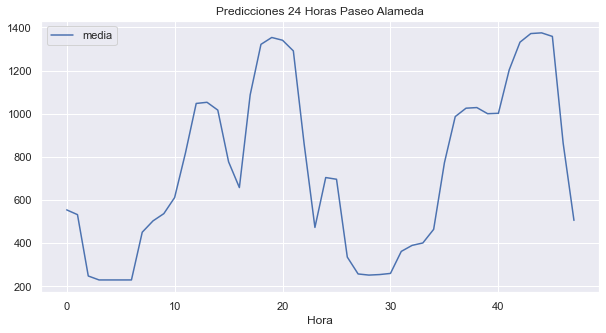

In [181]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 5))
sns.lineplot(data=data_pred_rf_107).set(title='Predicciones 24 Horas Paseo Alameda')

In [182]:
#Medias tramo 107 31/12/2015
df_before_107 = dataML_tramos.loc[(dataML_tramos['año'] == 2015) & (dataML_tramos['mes'] == 12) & \
                                     (dataML_tramos['dia'].isin([30,31])) & (dataML_tramos['id_tramos'] == 107)]
df_before_107

,año,mes,dia,horas,dias_sem,id_tramos,festivo,media
2992727,2015,12,30,0,3,107,0,434.000000
2993126,2015,12,30,1,3,107,0,312.000000
2993526,2015,12,30,2,3,107,0,196.500000
2993928,2015,12,30,3,3,107,0,167.000000
2994326,2015,12,30,4,3,107,0,96.500000
2994726,2015,12,30,5,3,107,0,91.250000
2995126,2015,12,30,6,3,107,0,174.000000
2995519,2015,12,30,7,3,107,0,471.000000
2995919,2015,12,30,8,3,107,0,1075.000000
2996302,2015,12,30,9,3,107,0,1269.000000


In [183]:
new_row_0 = [2015, 12, 31,0,4,1082,0,412.250000]
new_row_1 = [2015, 12, 31,3,4,1082,0,131.000000]
new_row_2 = [2015, 12, 31,6,4,1082,0,184.500000]
new_row_3 = [2015, 12, 31,7,4,1082,0,378.750000]
new_row_4 = [2015, 12, 31,14,4,1082,0,1647.000000]
new_row_5 = [2015, 12, 31,19,4,1082,0,912.000000]
new_row_6 = [2015, 12, 31,20,4,1082,0,763.750000]
new_row_7 = [2015, 12, 31,21,4,1082,0,501.000000]


df_before_107.loc[len(df_before_107.index)] = new_row_0
df_before_107.loc[len(df_before_107.index)] = new_row_1
df_before_107.loc[len(df_before_107.index)] = new_row_2
df_before_107.loc[len(df_before_107.index)] = new_row_3
df_before_107.loc[len(df_before_107.index)] = new_row_4
df_before_107.loc[len(df_before_107.index)] = new_row_5
df_before_107.loc[len(df_before_107.index)] = new_row_6
df_before_107.loc[len(df_before_107.index)] = new_row_7

df_sorted_107= df_before_107.sort_values(['dia','horas'])
df_sorted_107_mean = df_sorted_107['media'].tolist()
df_sorted_107_mean

[434.0,
 312.0,
 196.5,
 167.0,
 96.5,
 91.25,
 174.0,
 471.0,
 1075.0,
 1269.0,
 1193.0,
 1471.3333333333333,
 1570.0,
 1841.6666666666667,
 1995.25,
 1639.5,
 1519.75,
 1800.0,
 1941.3333333333333,
 1993.5,
 1682.25,
 1529.25,
 1245.25,
 587.25,
 412.25,
 328.75,
 257.0,
 131.0,
 86.0,
 99.0,
 184.5,
 378.75,
 577.3333333333334,
 637.0,
 910.25,
 1172.25,
 1336.5,
 1497.25,
 1647.0,
 1267.75,
 961.3333333333334,
 979.25,
 953.0,
 912.0,
 763.75,
 501.0,
 387.6666666666667,
 218.0]

In [184]:
df_dates_107 = dates_48.copy()
df_dates_107['Media'] = df_sorted_107_mean
df_dates_107.set_index('Fecha',inplace=True)
df_dates_107

,Media
Fecha,
2015-12-30 00:00:00,434.000000
2015-12-30 01:00:00,312.000000
2015-12-30 02:00:00,196.500000
2015-12-30 03:00:00,167.000000
2015-12-30 04:00:00,96.500000
2015-12-30 05:00:00,91.250000
2015-12-30 06:00:00,174.000000
2015-12-30 07:00:00,471.000000
2015-12-30 08:00:00,1075.000000


In [185]:
df_pred_dates_107 = pred_dates_48.copy()
df_pred_dates_107['Media'] = new_predictions_107
df_pred_dates_107.set_index('Fecha',inplace=True)
df_pred_dates_107

,Media
Fecha,
2016-01-01 00:00:00,552.812799
2016-01-01 01:00:00,530.675839
2016-01-01 02:00:00,245.742034
2016-01-01 03:00:00,227.394220
2016-01-01 04:00:00,227.394220
2016-01-01 05:00:00,227.394220
2016-01-01 06:00:00,227.430106
2016-01-01 07:00:00,449.068694
2016-01-01 08:00:00,501.740142


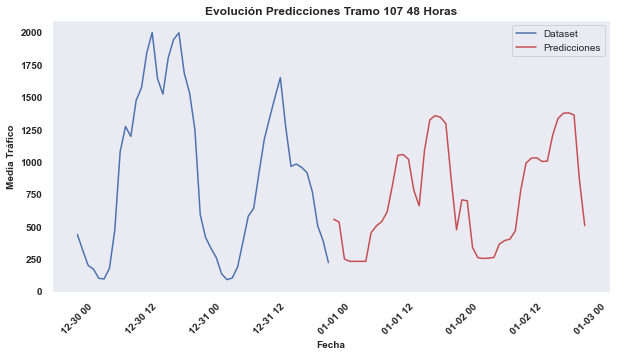

In [186]:
plt.figure(figsize=(10, 5))
plt.plot(df_dates_107, linestyle='solid', color='b')
plt.plot(df_pred_dates_107, linestyle='solid', color='r')

plt.legend(['Dataset','Predicciones'], loc='best', prop={'size': 10})
plt.title('Evolución Predicciones Tramo 107 48 Horas', weight='bold', fontsize=12)
plt.ylabel('Media Tráfico', weight='bold', fontsize=10)
plt.xlabel('Fecha', weight='bold', fontsize=10)
plt.xticks(weight='bold', fontsize=10, rotation=45)
plt.yticks(weight='bold', fontsize=10)
plt.grid(color = 'y', linewidth='0.5')
plt.show()

**-------------------------------------------------------------------------------------------------------**
**-------------------------------------------------------------------------------------------------------**

***Gráficos Evolución Predicciones***

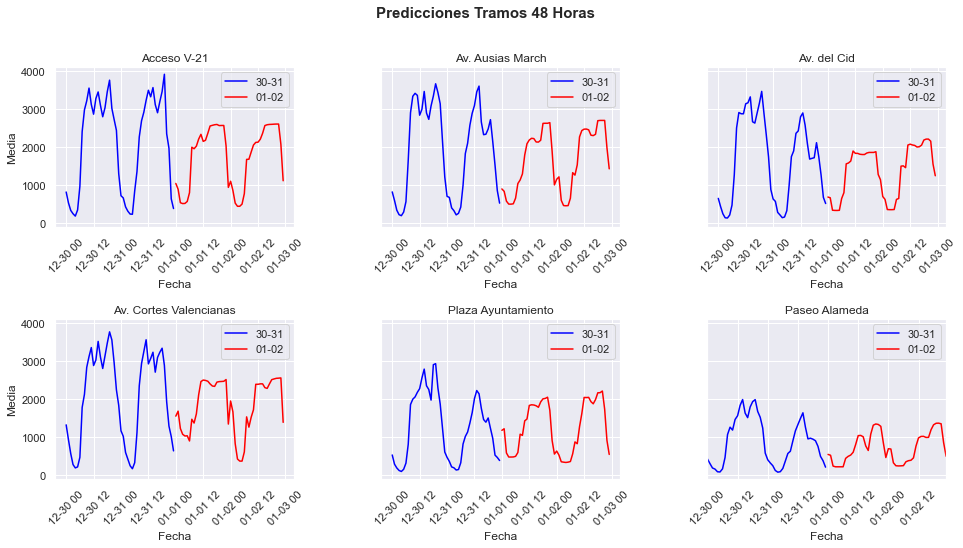

In [187]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8),sharey=True)
plt.margins(x=0,y=0)
fig.tight_layout(pad=6.0)
fig.suptitle('Predicciones Tramos 48 Horas',fontsize=15, weight='bold')

sns.lineplot(ax=axes[0, 0], data=df_dates_101['Media'],color='blue',label='30-31').set_title('Acceso V-21')
sns.lineplot(ax=axes[0, 0], data=df_pred_dates_101['Media'],color='red',label='01-02').set_title('Acceso V-21')
axes[0][0].tick_params(axis='x', rotation=45)

sns.lineplot(ax=axes[0, 1], data=df_dates_1027['Media'],color='blue',label='30-31').set_title('Av. Ausias March')
sns.lineplot(ax=axes[0, 1], data=df_pred_dates_1027['Media'],color='red',label='01-02').set_title('Av. Ausias March')
axes[0][1].tick_params(axis='x', rotation=45)

sns.lineplot(ax=axes[0, 2], data=df_dates_1069['Media'],color='blue',label='30-31').set_title('Av. del Cid')
sns.lineplot(ax=axes[0, 2], data=df_pred_dates_1069['Media'],color='red',label='01-02').set_title('Av. del Cid')
axes[0][2].tick_params(axis='x', rotation=45)

sns.lineplot(ax=axes[1, 0], data=df_dates_1082['Media'],color='blue',label='30-31').set_title('Av. Cortes Valencianas')
sns.lineplot(ax=axes[1, 0], data=df_pred_dates_1082['Media'],color='red',label='01-02').set_title('Av. Cortes Valencianas')
axes[1][0].tick_params(axis='x', rotation=45)

sns.lineplot(ax=axes[1, 1], data=df_dates_10357['Media'],color='blue',label='30-31').set_title('Plaza Ayuntamiento')
sns.lineplot(ax=axes[1, 1], data=df_pred_dates_10357['Media'],color='red',label='01-02').set_title('Plaza Ayuntamiento')
axes[1][1].tick_params(axis='x', rotation=45)

sns.lineplot(ax=axes[1, 2], data=df_dates_107['Media'],color='blue',label='30-31').set_title('Paseo Alameda')
sns.lineplot(ax=axes[1, 2], data=df_pred_dates_107['Media'],color='red',label='01-02').set_title('Paseo Alameda')
axes[1][2].tick_params(axis='x', rotation=45)

***Medias 24 Horas Tramos 01/01/2015***

101

In [34]:
df_101_year_ago = dataML_tramos.loc[(dataML_tramos['año'] == 2015) & (dataML_tramos['mes'] == 1) & \
                                     (dataML_tramos['dia'].isin([1,2])) & (dataML_tramos['id_tramos'] == 101)]

new_row_0 = [2015, 1, 1,18,4,101,1,2971.250000]
new_row_1 = [2015, 1, 1,19,4,101,1,3023.250000]
new_row_2 = [2015, 1, 2,11,5,101,0,1945.000000]
new_row_3 = [2015, 1, 2,12,5,101,0,2139.500000]
new_row_4 = [2015, 1, 2,13,5,101,0,2865.250000]
new_row_5 = [2015, 1, 2,14,5,101,0,3144.000000]
new_row_6 = [2015, 1, 2,17,5,101,0,2437.000000]
new_row_7 = [2015, 1, 2,18,5,101,0,2901.500000]
new_row_8 = [2015, 1, 2,19,5,101,0,3002.250000]
new_row_9 = [2015, 1, 2,20,5,101,0,2254.000000]




df_101_year_ago.loc[len(df_101_year_ago.index)] = new_row_0
df_101_year_ago.loc[len(df_101_year_ago.index)] = new_row_1
df_101_year_ago.loc[len(df_101_year_ago.index)] = new_row_2
df_101_year_ago.loc[len(df_101_year_ago.index)] = new_row_3
df_101_year_ago.loc[len(df_101_year_ago.index)] = new_row_4
df_101_year_ago.loc[len(df_101_year_ago.index)] = new_row_5
df_101_year_ago.loc[len(df_101_year_ago.index)] = new_row_6
df_101_year_ago.loc[len(df_101_year_ago.index)] = new_row_7
df_101_year_ago.loc[len(df_101_year_ago.index)] = new_row_8
df_101_year_ago.loc[len(df_101_year_ago.index)] = new_row_9


df_101_previous_sorted = df_101_year_ago.sort_values(['dia','horas'])
df_101_previous_list = df_101_previous_sorted['media'].tolist()

df_101_previous_sorted_mean = pd.DataFrame(df_101_previous_list,columns = ['media'])
df_101_previous_sorted_mean.insert(loc=0, column='Hora', value=np.arange(len(df_101_previous_sorted_mean)))
df_101_previous_sorted_mean.set_index('Hora',inplace=True)
df_101_previous_sorted_mean

,media
Hora,
0,419.333333
1,1524.666667
2,1118.666667
3,776.000000
4,652.666667
5,570.000000
6,606.000000
7,645.250000
8,664.250000


1027

In [65]:
df_1027_year_ago = dataML_tramos.loc[(dataML_tramos['año'] == 2015) & (dataML_tramos['mes'] == 1) & \
                                     (dataML_tramos['dia'].isin([1,2])) & (dataML_tramos['id_tramos'] == 1027)]

new_row_0 = [2015, 1, 2,19,5,101,0,2832.250000]
df_1027_year_ago.loc[len(df_1027_year_ago.index)] = new_row_0


df_1027_previous_sorted = df_1027_year_ago.sort_values(['dia','horas'])
df_1027_previous_list = df_1027_previous_sorted['media'].tolist()

df_1027_previous_sorted_mean = pd.DataFrame(df_1027_previous_list,columns = ['media'])
df_1027_previous_sorted_mean.insert(loc=0, column='Hora', value=np.arange(len(df_1027_previous_sorted_mean)))
df_1027_previous_sorted_mean.set_index('Hora',inplace=True)
df_1027_previous_sorted_mean

,media
Hora,
0,422.333333
1,1415.333333
2,1154.000000
3,863.000000
4,765.000000
5,762.000000
6,606.250000
7,539.000000
8,517.750000


1069

In [97]:
df_1069_year_ago = dataML_tramos.loc[(dataML_tramos['año'] == 2015) & (dataML_tramos['mes'] == 1) & \
                                     (dataML_tramos['dia'].isin([1,2])) & (dataML_tramos['id_tramos'] == 1069)]

df_1069_previous_sorted = df_1069_year_ago.sort_values(['dia','horas'])
df_1069_previous_list = df_1069_previous_sorted['media'].tolist()

df_1069_previous_sorted_mean = pd.DataFrame(df_1069_previous_list,columns = ['media'])
df_1069_previous_sorted_mean.insert(loc=0, column='Hora', value=np.arange(len(df_1069_previous_sorted_mean)))
df_1069_previous_sorted_mean.set_index('Hora',inplace=True)
df_1069_previous_sorted_mean

,media
Hora,
0,530.000000
1,1487.333333
2,1227.000000
3,773.666667
4,843.333333
5,651.750000
6,707.000000
7,605.500000
8,562.500000


1082

In [129]:
df_1082_year_ago = dataML_tramos.loc[(dataML_tramos['año'] == 2015) & (dataML_tramos['mes'] == 1) & \
                                     (dataML_tramos['dia'].isin([1,2])) & (dataML_tramos['id_tramos'] == 1082)]
#df_1082_year_ago

new_row_0 = [2015, 1, 1,19,4,101,1,3571.250000]
new_row_1 = [2015, 1, 2,11,5,101,0,2234.000000]
new_row_2 = [2015, 1, 2,12,5,101,0,2553.500000]
new_row_3 = [2015, 1, 2,13,5,101,0,2986.250000]
new_row_4 = [2015, 1, 2,14,5,101,0,3002.000000]
new_row_5 = [2015, 1, 2,18,5,101,0,3252.000000]
new_row_6 = [2015, 1, 2,19,5,101,0,3611.500000]
new_row_7 = [2015, 1, 2,20,5,101,0,3215.500000]



df_1082_year_ago.loc[len(df_1082_year_ago.index)] = new_row_0
df_1082_year_ago.loc[len(df_1082_year_ago.index)] = new_row_1
df_1082_year_ago.loc[len(df_1082_year_ago.index)] = new_row_2
df_1082_year_ago.loc[len(df_1082_year_ago.index)] = new_row_3
df_1082_year_ago.loc[len(df_1082_year_ago.index)] = new_row_4
df_1082_year_ago.loc[len(df_1082_year_ago.index)] = new_row_5
df_1082_year_ago.loc[len(df_1082_year_ago.index)] = new_row_6
df_1082_year_ago.loc[len(df_1082_year_ago.index)] = new_row_7


df_1082_previous_sorted = df_1082_year_ago.sort_values(['dia','horas'])
df_1082_previous_list = df_1082_previous_sorted['media'].tolist()

df_1082_previous_sorted_mean = pd.DataFrame(df_1082_previous_list,columns = ['media'])
df_1082_previous_sorted_mean.insert(loc=0, column='Hora', value=np.arange(len(df_1082_previous_sorted_mean)))
df_1082_previous_sorted_mean.set_index('Hora',inplace=True)
df_1082_previous_sorted_mean

,media
Hora,
0,794.666667
1,2736.000000
2,2182.666667
3,1540.000000
4,1343.000000
5,1097.250000
6,1016.500000
7,948.750000
8,817.750000


10357

In [162]:
df_10357_year_ago = dataML_tramos.loc[(dataML_tramos['año'] == 2015) & (dataML_tramos['mes'] == 1) & \
                                     (dataML_tramos['dia'].isin([1,2])) & (dataML_tramos['id_tramos'] == 10357)]
#df_10357_year_ago

df_10357_previous_sorted = df_10357_year_ago.sort_values(['dia','horas'])
df_10357_previous_list = df_10357_previous_sorted['media'].tolist()

df_10357_previous_sorted_mean = pd.DataFrame(df_10357_previous_list,columns = ['media'])
df_10357_previous_sorted_mean.insert(loc=0, column='Hora', value=np.arange(len(df_10357_previous_sorted_mean)))
df_10357_previous_sorted_mean.set_index('Hora',inplace=True)
df_10357_previous_sorted_mean

,media
Hora,
0,539.666667
1,2712.666667
2,1918.333333
3,1338.000000
4,1042.666667
5,904.000000
6,820.000000
7,766.500000
8,857.000000


107

In [194]:
df_107_year_ago = dataML_tramos.loc[(dataML_tramos['año'] == 2015) & (dataML_tramos['mes'] == 1) & \
                                     (dataML_tramos['dia'].isin([1,2])) & (dataML_tramos['id_tramos'] == 107)]
#df_107_year_ago

df_107_previous_sorted = df_107_year_ago.sort_values(['dia','horas'])
df_107_previous_list = df_107_previous_sorted['media'].tolist()

df_107_previous_sorted_mean = pd.DataFrame(df_107_previous_list,columns = ['media'])
df_107_previous_sorted_mean.insert(loc=0, column='Hora', value=np.arange(len(df_107_previous_sorted_mean)))
df_107_previous_sorted_mean.set_index('Hora',inplace=True)
df_107_previous_sorted_mean

,media
Hora,
0,370.000000
1,1165.666667
2,1083.000000
3,811.333333
4,683.666667
5,485.250000
6,397.000000
7,400.000000
8,525.500000


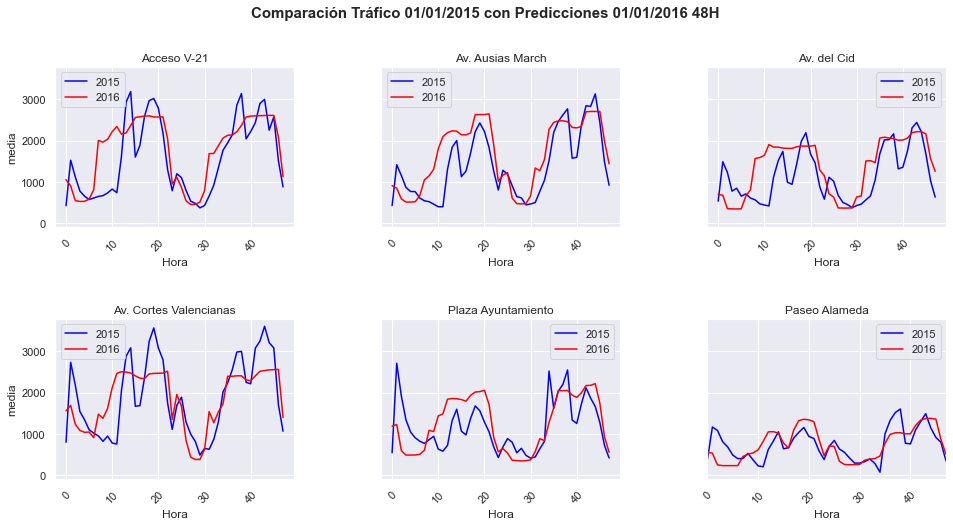

In [195]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8),sharey=True)
plt.margins(x=0,y=0)
fig.tight_layout(pad=6.0)
fig.suptitle('Comparación Tráfico 01/01/2015 con Predicciones 01/01/2016 48H',fontsize=15, weight='bold')

sns.lineplot(ax=axes[0, 0], data=df_101_previous_sorted_mean['media'],color='blue',label='2015').set_title('Acceso V-21')
sns.lineplot(ax=axes[0, 0], data=data_pred_rf_101['media'],color='red',label='2016').set_title('Acceso V-21')
axes[0][0].tick_params(axis='x', rotation=45)

sns.lineplot(ax=axes[0, 1], data=df_1027_previous_sorted_mean['media'],color='blue',label='2015').set_title('Av. Ausias March')
sns.lineplot(ax=axes[0, 1], data=data_pred_rf_1027['media'],color='red',label='2016').set_title('Av. Ausias March')
axes[0][1].tick_params(axis='x', rotation=45)

sns.lineplot(ax=axes[0, 2], data=df_1069_previous_sorted_mean['media'],color='blue',label='2015').set_title('Av. del Cid')
sns.lineplot(ax=axes[0, 2], data=data_pred_rf_1069['media'],color='red',label='2016').set_title('Av. del Cid')
axes[0][2].tick_params(axis='x', rotation=45)

sns.lineplot(ax=axes[1, 0], data=df_1082_previous_sorted_mean['media'],color='blue',label='2015').set_title('Av. Cortes Valencianas')
sns.lineplot(ax=axes[1, 0], data=data_pred_rf_1082['media'],color='red',label='2016').set_title('Av. Cortes Valencianas')
axes[1][0].tick_params(axis='x', rotation=45)

sns.lineplot(ax=axes[1, 1], data=df_10357_previous_sorted_mean['media'],color='blue',label='2015').set_title('Plaza Ayuntamiento')
sns.lineplot(ax=axes[1, 1], data=data_pred_rf_10357['media'],color='red',label='2016').set_title('Plaza Ayuntamiento')
axes[1][1].tick_params(axis='x', rotation=45)

sns.lineplot(ax=axes[1, 2], data=df_107_previous_sorted_mean['media'],color='blue',label='2015').set_title('Paseo Alameda')
sns.lineplot(ax=axes[1, 2], data=data_pred_rf_107['media'],color='red',label='2016').set_title('Paseo Alameda')
axes[1][2].tick_params(axis='x', rotation=45)